<center><img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png"></center>

# so now let's look at the Description that were written in kaggle**


###Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

###With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# we will import every important library to use right one cell down


In [237]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# Additional libraries
import matplotlib.patches as mpatches 

from scipy import stats # for spearman

import plotly.express as px # for 3D plot
from mpl_toolkits.mplot3d import Axes3D # for 3D plot

import h2o # for Random Forest without having to encode the labels
from h2o.estimators import H2ORandomForestEstimator # for Random Forest without having to encode the labels
h2o.init() # to be connected to all modules

import missingno as msno # it show us the missing values on a graph

from sklearn.utils import shuffle #shuffling the data set

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

# metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import get_scorer_names

# model_selection
from sklearn.model_selection import train_test_split # to split the data to train and test
from sklearn.model_selection import validation_curve,cross_val_score,cross_val_predict

# feature selection
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, f_classif,chi2

# linear model
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor

# other algorithms
from sklearn.neighbors import KNeighborsRegressor
import sklearn.neighbors as sn
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 

## Tuning
from sklearn.model_selection import GridSearchCV

import sklearn.linear_model as sl

# ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor ## One for each task
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 12 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_bgwfby
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.488 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# Data Description


In [377]:
description = open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt', 'r')
if description.readable():
    print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# data understanding and EDA

## the next step that we must do in any dataset is reading the the first 5 rows of the dataset for read it

In [238]:
"""because of having More than the usual columns 
    we can not see all columns without 
    runing the code that right down
"""
pd.set_option("display.max_columns",None)


In [239]:
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
house_price_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv",na_values=["nan","NaN",np.NaN,""," ",np.nan,"?"])
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [240]:
house_price_df=shuffle(house_price_df,)

In [241]:
col_id=house_price_df[["Id"]]
house_price_df.drop("Id",axis=1)
col_id

,Id
998,999
1226,1227
1261,1262
1073,1074
1365,1366
...,...
517,518
451,452
211,212
175,176


In [242]:
#Let's see the total number of rows and columns
house_price_df.shape

(1460, 81)

# Outliers

In [243]:
cond_outs=np.abs(house_price_df["SalePrice"]-house_price_df["SalePrice"].mean())<=3*house_price_df["SalePrice"].std()
house_price_df_out=house_price_df[cond_outs]

print(f"house_price_df before removing outliers: {house_price_df.shape}")
print(f"house_price_df after removing outliers: {house_price_df_out.shape}")
house_price_df=house_price_df_out

house_price_df before removing outliers: (1460, 81)
house_price_df after removing outliers: (1438, 81)


In [244]:
#numerical and categorical features
numerical_types=["float64","float32","int64","int32"]
num_col=[col for col in house_price_df.columns if house_price_df[col].dtype in numerical_types]
categ_col=[col for col in house_price_df.columns if house_price_df[col].dtype not in numerical_types]

#let me print them 
print(f"all numerical columns are ->\n {num_col}")
print("-"*100)
print(f"all categorical columns are ->\n {categ_col}")


all numerical columns are ->
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
----------------------------------------------------------------------------------------------------
all categorical columns are ->
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 

# some data extraction

# I have done this step after some steps down

In [245]:
house_price_df["YearBuilt"]=2025-house_price_df["YearBuilt"]
house_price_df["YearBuilt"]

998     103
1226     18
1261     69
1073     48
1365     25
       ... 
517      29
451      50
211      16
175      75
30      105
Name: YearBuilt, Length: 1438, dtype: int64

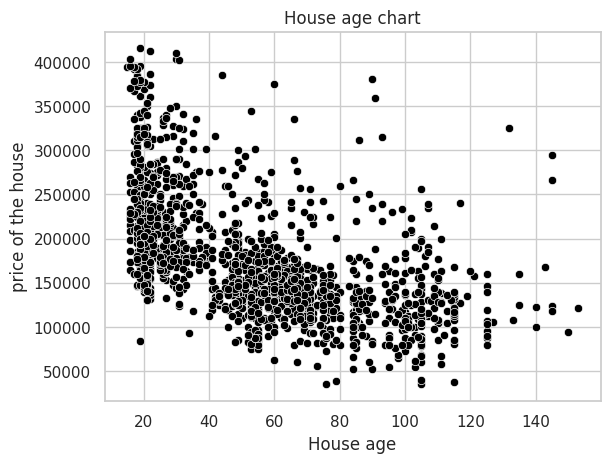

-0.6459826860461855

In [246]:
ax=sns.scatterplot(data=house_price_df,
                   x="YearBuilt",
                   y="SalePrice",
                   color="black"
                  )
ax.set_xlabel("House age")
ax.set_ylabel("price of the house")
ax.set_title("House age chart")
plt.show()
spearman,_=stats.spearmanr(house_price_df["SalePrice"],house_price_df["YearBuilt"])
spearman

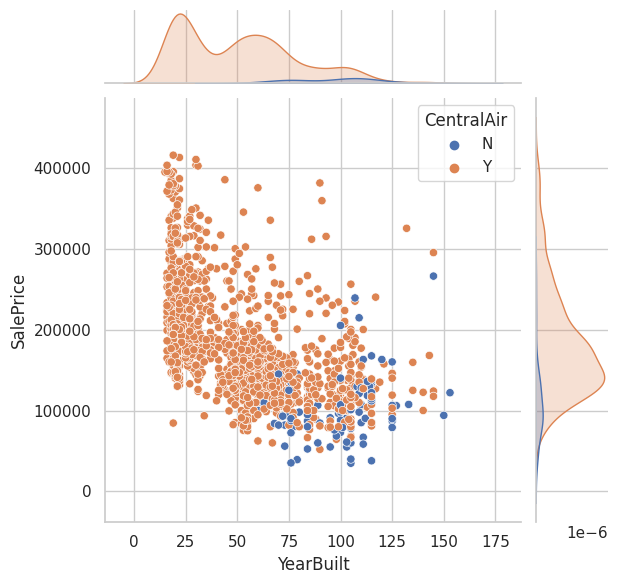

In [247]:
sns.jointplot(data=house_price_df, 
              x="YearBuilt",
              y="SalePrice",
              hue="CentralAir"
             )
plt.show()

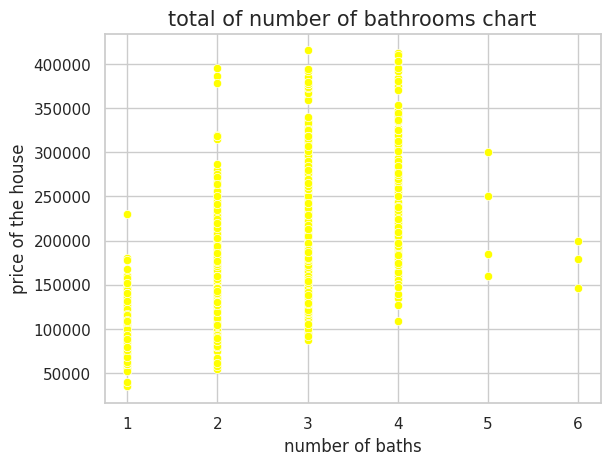

-0.6459826860461855

In [248]:
house_price_df["totall_number_of_bathrooms"]=house_price_df["BsmtFullBath"]+house_price_df["BsmtHalfBath"]+house_price_df["FullBath"]+house_price_df["HalfBath"]
test_data["totall_number_of_bathrooms"]=test_data["BsmtFullBath"]+test_data["BsmtHalfBath"]+test_data["FullBath"]+test_data["HalfBath"]

ax=sns.scatterplot(data=house_price_df,
                   x="totall_number_of_bathrooms",
                   y="SalePrice",
                   color="yellow"
                  )

ax.set_xlabel("number of baths",fontsize=12)
ax.set_ylabel("price of the house",fontsize=12)
ax.set_title("total of number of bathrooms chart",fontsize=15)
plt.show()
spearman,_=stats.spearmanr(house_price_df["SalePrice"],house_price_df["YearBuilt"])
spearman

In [249]:
# the description of numerical columns 
house_price_df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1438.00,730.91,422.39,1.00,364.25,731.50,1095.75,1460.00
MSSubClass,1438.00,57.06,42.53,20.00,20.00,50.00,70.00,190.00
LotFrontage,1181.00,69.71,24.10,21.00,59.00,69.00,80.00,313.00
LotArea,1438.00,10401.34,9945.34,1300.00,7500.00,9400.00,11441.00,215245.00
OverallQual,1438.00,6.05,1.33,1.00,5.00,6.00,7.00,10.00
OverallCond,1438.00,5.58,1.12,1.00,5.00,5.00,6.00,9.00
YearBuilt,1438.00,54.16,30.09,15.00,25.00,53.00,71.75,153.00
YearRemodAdd,1438.00,1984.57,20.65,1950.00,1966.00,1993.00,2004.00,2010.00
MasVnrArea,1431.00,97.83,169.05,0.00,0.00,0.00,159.00,1600.00
BsmtFinSF1,1438.00,432.39,442.68,0.00,0.00,378.00,698.75,5644.00


In [250]:
# the description of categorical columns 
house_price_df[categ_col].describe().T

,count,unique,top,freq
MSZoning,1438,5,RL,1130
Street,1438,2,Pave,1432
Alley,91,2,Grvl,50
LotShape,1438,4,Reg,918
LandContour,1438,4,Lvl,1291
Utilities,1438,2,AllPub,1437
LotConfig,1438,5,Inside,1038
LandSlope,1438,3,Gtl,1361
Neighborhood,1438,25,NAmes,225
Condition1,1438,9,Norm,1240


# Goal analysis

## SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

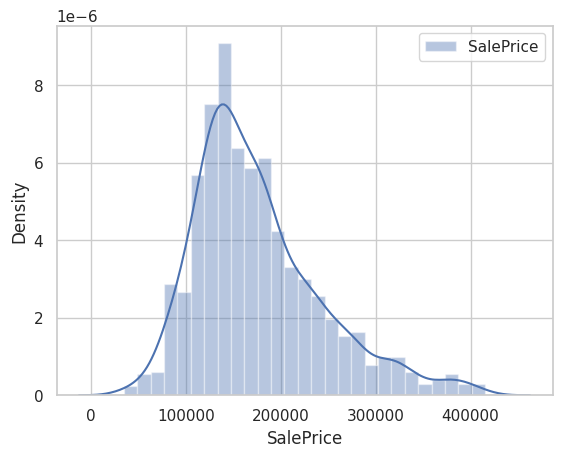

In [251]:
sns.distplot(house_price_df.SalePrice,
             label="SalePrice"
            )
plt.legend()
plt.show()

# first feature

## MSSubClass: The building class


In [252]:
house_price_df.MSSubClass.value_counts()

MSSubClass
20     528
60     286
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      15
45      12
180     10
40       4
Name: count, dtype: int64

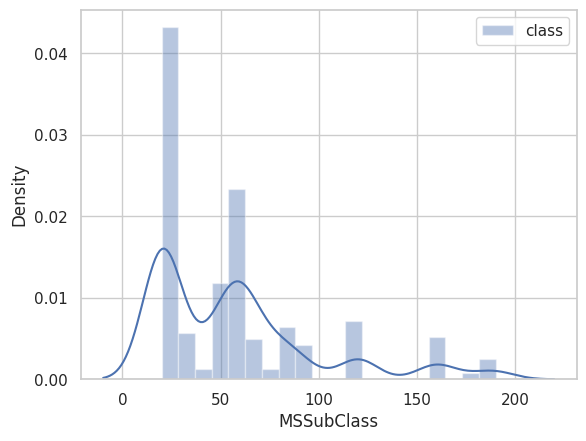

In [253]:
sns.distplot(house_price_df.MSSubClass,
             label="class"
            )
plt.legend()
plt.show()

In [254]:
house_price_df.MSSubClass.isna().sum()

0

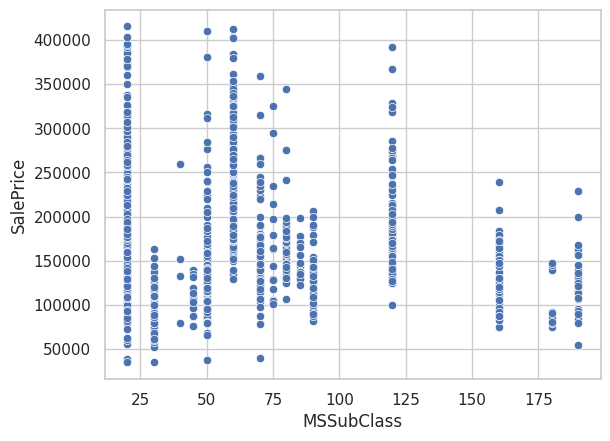

In [255]:
sns.scatterplot(data=house_price_df,
                x="MSSubClass",
                y="SalePrice"
               )
plt.show()

In [256]:
house_price_df[["SalePrice","MSSubClass"]].corr()

,SalePrice,MSSubClass
SalePrice,1.00,-0.08
MSSubClass,-0.08,1.00


### MSSubClass:it means the building class and it seems to have so bad correlation with the target but i was thinking about that this featre represents classes so it should be categorical variable so using this feature i will make a new columns made up of bins

In [257]:
sorted_MSSubClass=sorted(house_price_df.MSSubClass.unique())
sorted_MSSubClass

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]

## instead of writing this code below if i just changed the type of the feature to categorical it would be done but even improving the coding skill is well

In [258]:
bins_MSSubClass=sorted(house_price_df.MSSubClass.unique())+[np.inf] #كل 2 مجال لحال اعتمادا على الرسمة فوق #np.inf:يعني للاخير
cut_MSSubClass=list(map(str,sorted_MSSubClass))
bins_MSSubClass=list(map(lambda x:x-0.1,bins_MSSubClass))
MSSubClass_bins=pd.cut(x=house_price_df["MSSubClass"],
                       bins=bins_MSSubClass,
                       labels=cut_MSSubClass
                      )
house_price_df["MSSubClass"]=MSSubClass_bins
MSSubClass_bins.head()

998     30
1226    60
1261    20
1073    60
1365    60
Name: MSSubClass, dtype: category
Categories (15, object): ['20' < '30' < '40' < '45' ... '120' < '160' < '180' < '190']

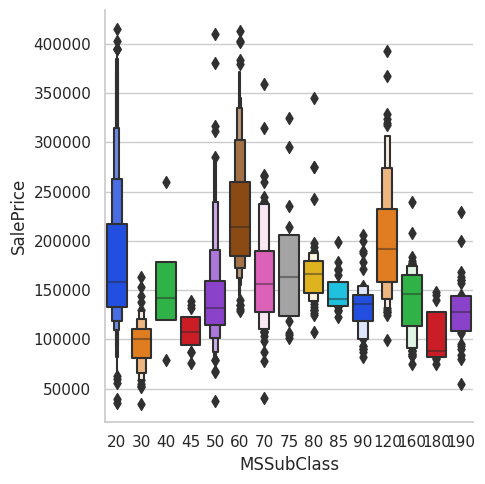

In [259]:
palette_color = sns.color_palette('bright')
sns.catplot(y="SalePrice",
            data=house_price_df,
            kind="boxen",
            x="MSSubClass",
            palette=palette_color
           )
plt.show();

## i want to see the variation between groups and the variation within groups

In [260]:
#the variation between within groups:
#pd.set_option("display.float_format",'{:.2f}'.format)
variation_MSSubClass=house_price_df.groupby(by="MSSubClass")[["SalePrice"]].var()
variation_MSSubClass

,SalePrice
MSSubClass,
20,4842436805.88
30,617875921.70
40,5737729166.67
45,409322651.52
50,3008740116.64
60,3204840059.00
70,3388001969.50
75,4750757142.86
80,1459072594.92


In [261]:
#the variation mean between groups:
#pd.set_option("display.float_format",'{:.2f}'.format)
mean_MSSubClass=house_price_df.groupby(by="MSSubClass")[["SalePrice"]].mean()
mean_MSSubClass

,SalePrice
MSSubClass,
20,180658.15
30,95829.72
40,156125.00
45,108591.67
50,143302.97
60,226685.57
70,166772.42
75,173600.00
80,169736.55


### let us explain all things in this column:
#### 1. firstly it doesn't have any good correlation with the target(when it was a categorical type and even a numerical type)
#### 2. it has lots of outliers 

# we will try ro use ANOVA method

In [262]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ MSSubClass",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups
#	df=house_price_df["MSSubClass"].nunique() 

,sum_sq,df,F,PR(>F)
MSSubClass,1776995293795.21,14.00,37.90,0.00
Residual,4765653992389.58,1423.00,NaN,NaN


### i will not take this feature to build our regression model 

In [263]:
house_price_df.drop("MSSubClass",axis=1,inplace=True)

# second feature

## MSZoning: The general zoning classification

In [264]:
MSZoning_value=house_price_df["MSZoning"].value_counts()
MSZoning_value

MSZoning
RL         1130
RM          217
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

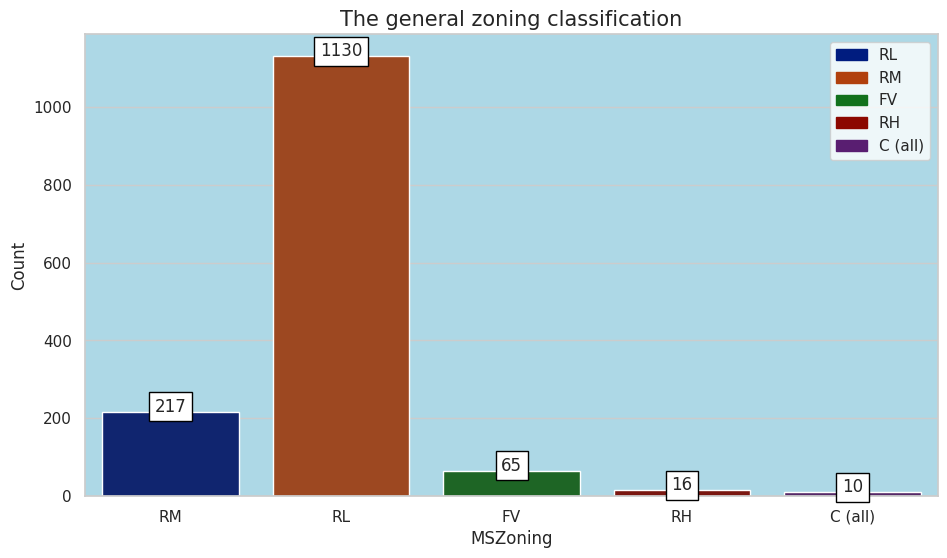

In [265]:
# Use the 'Set1' color palette
palette_color = sns.color_palette('dark') #there are more types of colors for example ["set1","set2","set3","dark","bright"]
plt.figure(figsize=(11,6))
sns.set_theme(style="whitegrid")
ax=sns.countplot(data=house_price_df,
                 x="MSZoning",
                 palette=palette_color
                )

ax.set_xlabel("MSZoning",fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title("The general zoning classification",fontsize=15)

# Create a custom legend with updated colors
categories = MSZoning_value.index
handles = [mpatches.Patch(color=palette_color[i], label=cat) for i, cat in enumerate(categories)]
plt.legend(handles=handles)
num_col=house_price_df.shape[0]
for p in ax.patches:
  percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
  #ax.annotate(percent,(p.get_x()+p.get_width()/2.,p.get_height()/2),ha="center",bbox=dict(facecolor="lightblue",edgecolor="black"))
plt.gca().set_facecolor("lightblue")
plt.show()


### let's try to show pie chart to build a better understanding

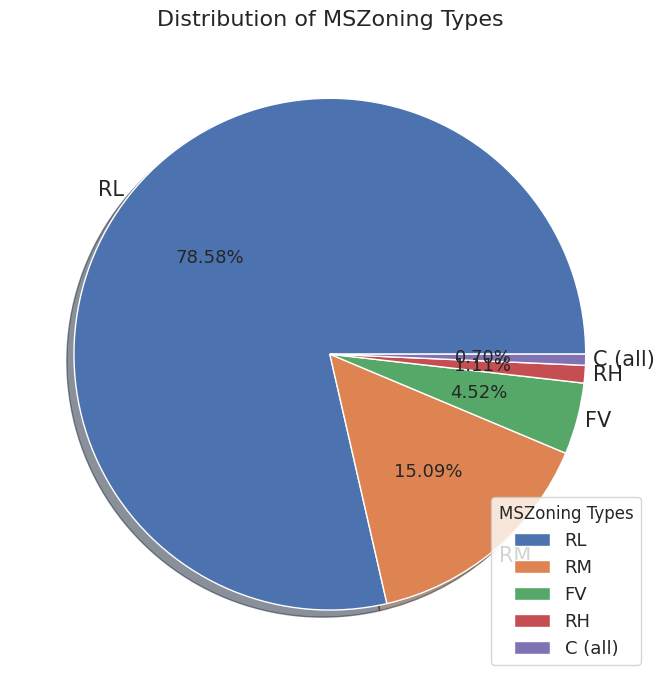

In [266]:
MSZoning_types = house_price_df["MSZoning"].value_counts()
plt.figure(figsize=(9,7))
# Create the pie chart
patches, texts, autotexts = plt.pie(MSZoning_types.values,
                                    labels=MSZoning_types.index,
                                    labeldistance=1.03,
                                    autopct="%1.2f%%",
                                    shadow=True
                                   )

# Set the font size for the labels and the autopct
for text in texts:
    text.set_fontsize(15)
for autotext in autotexts:
    autotext.set_fontsize(13)

# Set a title for the plot
plt.title('Distribution of MSZoning Types', fontsize=16)
plt.legend(title="MSZoning Types", fontsize=13)
plt.tight_layout()
plt.show()

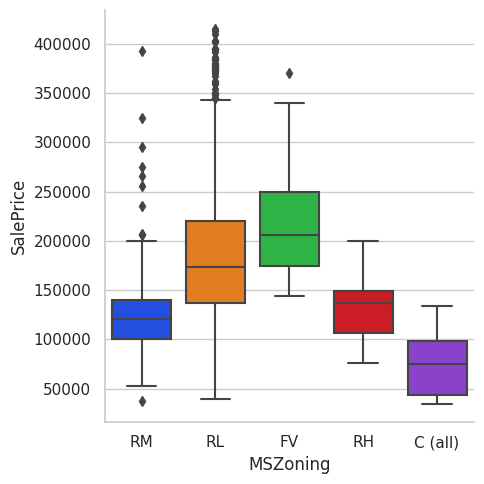

In [267]:
palette_color = sns.color_palette('bright')
sns.catplot(y="SalePrice",
            data=house_price_df,
            kind="box",
            x="MSZoning",
            palette=palette_color
           )
plt.show();

In [268]:
#the variation mean between groups:
pd.set_option("display.float_format",'{:.2f}'.format)
mean_MSSubClass=house_price_df.groupby(by="MSZoning")[["SalePrice"]].mean()
mean_MSSubClass

,SalePrice
MSZoning,
C (all),74528.00
FV,214014.06
RH,131558.38
RL,184992.24
RM,124710.00


In [269]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ MSZoning",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups


,sum_sq,df,F,PR(>F)
MSZoning,890687660372.87,4.00,56.46,0.00
Residual,5651961625811.88,1433.00,NaN,NaN


### I think MSZoning feature would be not so well to build the model but we can try it

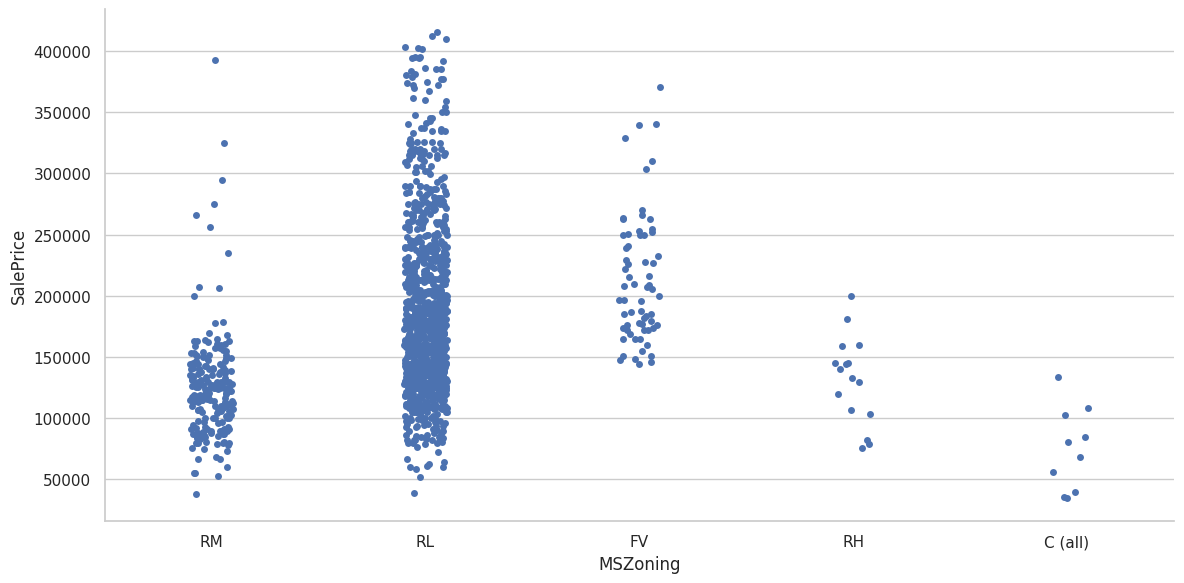

In [270]:
sns.catplot(data=house_price_df, 
            x="MSZoning",
            y="SalePrice", 
            height=6, 
            aspect=2
           )
plt.show()

### after tring catplot i think it is not good to build the model 

In [271]:
house_price_df.drop("MSZoning",axis=1,inplace=True)

# third feature

## LotFrontage: Linear feet of street connected to property

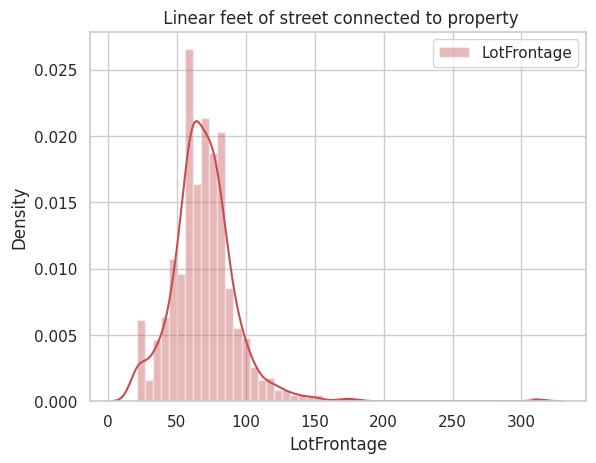

In [272]:
ax=sns.distplot(house_price_df.LotFrontage,
                label="LotFrontage",
                color="r"
               )
plt.legend()
ax.set_title(" Linear feet of street connected to property")
plt.show()

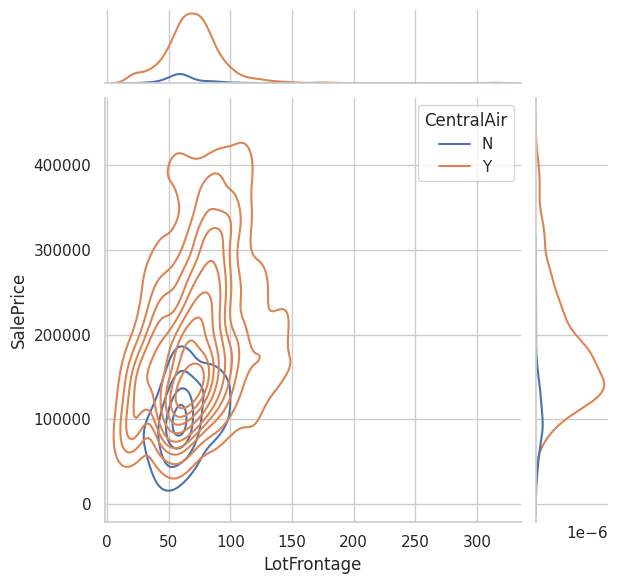

In [273]:
sns.jointplot(data=house_price_df, 
              x="LotFrontage",
              y="SalePrice",
              hue="CentralAir",
              kind="kde"
             )
plt.show()

the correlation between LotFrontage and SalePrice is --> 0.342


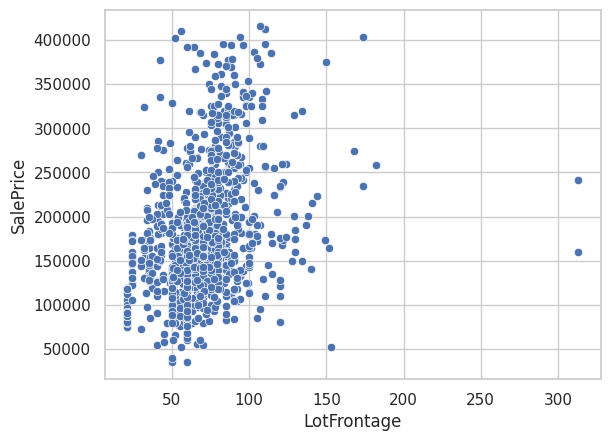

In [274]:
def correlation(target,feature):
    corr=house_price_df[[feature,target]].corr()[target][0]
    return np.round(corr,3)

print(f"the correlation between LotFrontage and SalePrice is --> {correlation('SalePrice','LotFrontage')}")
sns.scatterplot(data=house_price_df,
                x="LotFrontage",
                y="SalePrice"
               )
plt.show()

# 4'th feature

## LotArea: Lot size in square feet

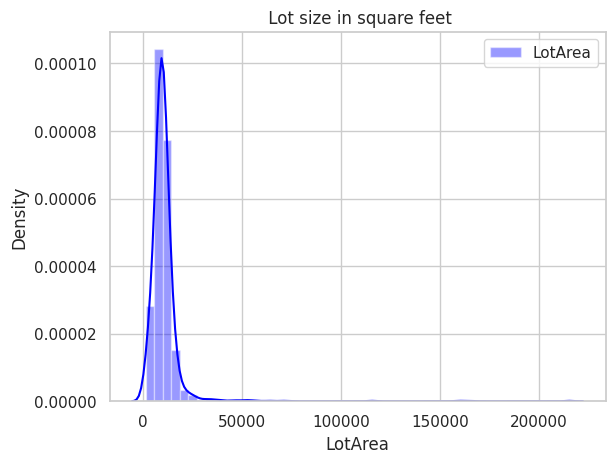

In [275]:
ax=sns.distplot(house_price_df.LotArea,
                label="LotArea",
                color="blue",
                kde = True
               )
plt.legend()
ax.set_title(" Lot size in square feet")
plt.show()

### by looking at the chart the plot seems that it has low variance 

## i will try to change the graph to Normal distribution using (box cox)

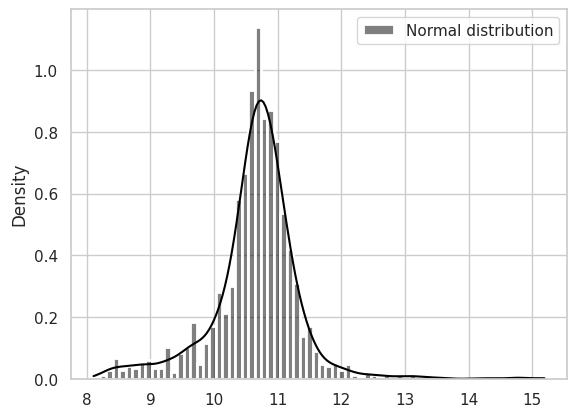

In [276]:
fittedData_LotArea, lambdaValue = stats.boxcox(house_price_df["LotArea"]) 

sns.histplot(fittedData_LotArea, 
             kde = True,
             stat="density",
             linewidth=2,
             label = "Normal distribution", 
             color ="black"
            )  
plt.legend()
plt.show()

In [277]:
# replace the LotArea feature with the new feature which is the normal dist. of it
house_price_df["LotArea"]=fittedData_LotArea
# i will try to remember that does changing the distribution of the feature do any optimization?

the correlation between L otArea and SalePrice is --> 0.374


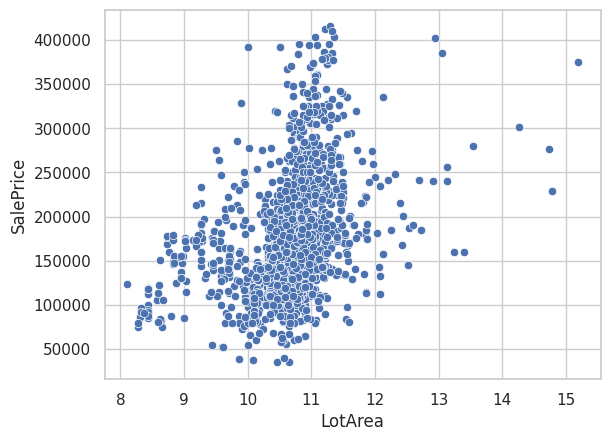

In [278]:
def correlation(target,feature):
    corr=house_price_df[[feature,target]].corr()[target][0]
    return np.round(corr,3)

print(f"the correlation between L otArea and SalePrice is --> {correlation('SalePrice','LotArea')}")
sns.scatterplot(data=house_price_df,
                x="LotArea",
                y="SalePrice"
               )
plt.show() 

In [279]:
#pearson method and p_value

correlation, p_value = stats.pearsonr(house_price_df["SalePrice"], house_price_df["LotArea"])
print(f"pearson coefficient is {format(correlation, '.5f')} and p_value is {p_value}")
#p_value:When it is less than 0.001, it means that there is certainty with the correlation

pearson coefficient is 0.37351 and p_value is 7.907436327076795e-49


In [280]:
# Calculate Spearman correlation
spearman_corr, _ = stats.spearmanr(house_price_df["SalePrice"], house_price_df["LotArea"])

print(f'Spearman correlation: {np.round(spearman_corr,2)}')

Spearman correlation: 0.44


# 5'th feature

## Street: Type of road access


In [281]:
# printing the categories of Street feature to see what does it include 
categories=list(house_price_df["Street"].unique())
print(f"the categories of Street feature are --> {categories}")

"""pave:pavement
   Grvl:Gravel
"""

the categories of Street feature are --> ['Pave', 'Grvl']


'pave:pavement\n   Grvl:Gravel\n'

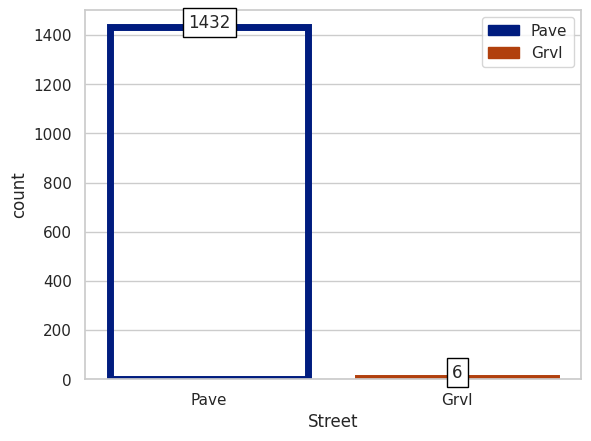

In [282]:
palette_color=sns.color_palette("dark",2)
ax=sns.countplot(x="Street",
                 data=house_price_df,
                 facecolor=(0,0,0,0),
                 linewidth=5,
                 edgecolor=palette_color
                )

handles = [mpatches.Patch(color=palette_color[i], label=cat) for i, cat in enumerate(categories)]
plt.legend(handles=handles)
num_col=house_price_df.shape[0]
for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )

plt.show()


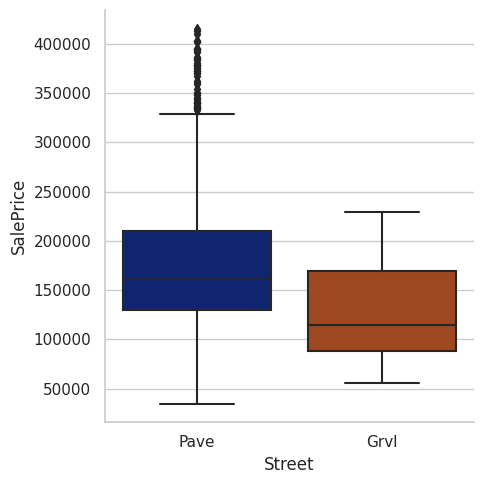

In [283]:
palette_color = sns.color_palette('bright')

sns.catplot(y="SalePrice",
            data=house_price_df,
            kind="box",
            x="Street",
            palette=sns.color_palette("dark",2)
           )
plt.show();

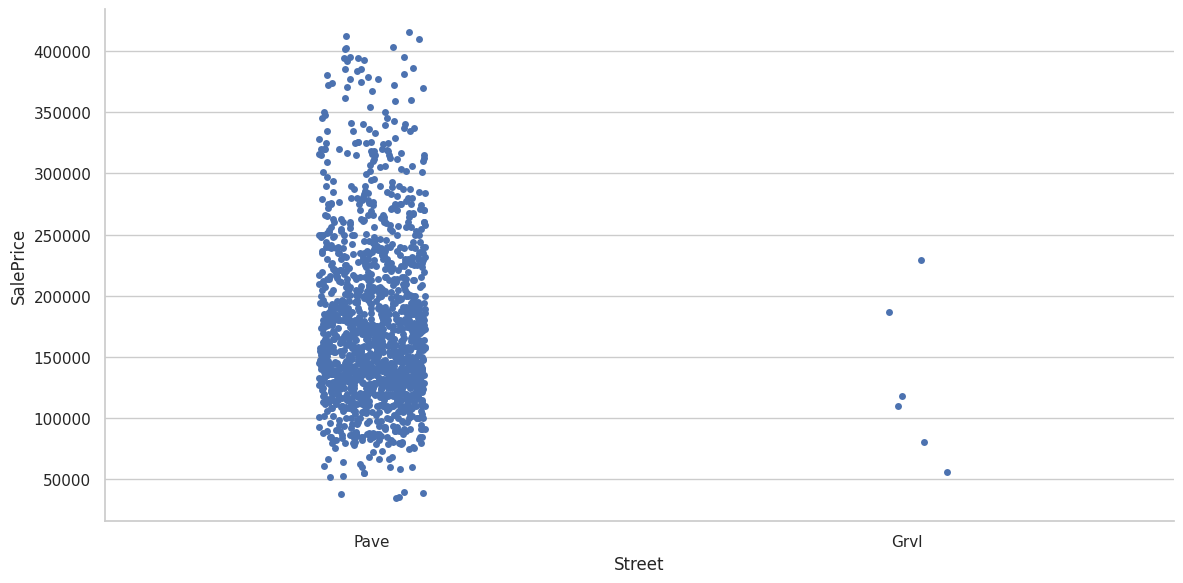

In [284]:
sns.catplot(data=house_price_df, 
            x="Street", 
            y="SalePrice",
            height=6, 
            aspect=2
           )
plt.show()

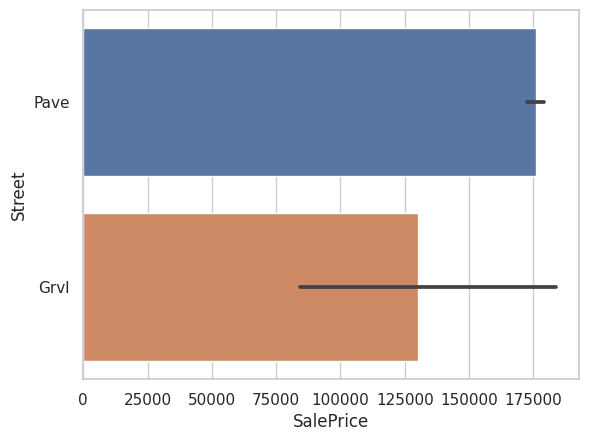

In [285]:
sns.barplot(y=house_price_df["Street"],
            x=house_price_df["SalePrice"]
           )
plt.show()

In [286]:
house_price_df.groupby("Street")["SalePrice"].mean()

Street
Grvl   130190.50
Pave   176035.81
Name: SalePrice, dtype: float64

## ANOVA 

In [287]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ Street",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups


,sum_sq,df,F,PR(>F)
Street,12558136832.95,1.00,2.76,0.10
Residual,6530091149351.84,1436.00,NaN,NaN


## this feature has not any impotance to predict the value also the value_count in this feature is so difference

In [288]:
house_price_df.drop("Street",axis=1,inplace=True)

# 6'th feature

## Alley: Type of alley access

In [289]:
# printing the categories of Street feature to see what does it include 
categories=list(house_price_df["Alley"].unique())
print(f"the categories of Street feature are --> {categories}")
"""pave:pavement
   Grvl:Gravel
"""

the categories of Street feature are --> [nan, 'Grvl', 'Pave']


'pave:pavement\n   Grvl:Gravel\n'

## it have some null values lets see if this feature is important to use we will treat it

In [290]:
# printing the rate value of null values of Alley feature
rate_null=house_price_df["Alley"].isna().sum()/house_price_df.shape[0]
print(f"the percent of null values of Alley feature is --> {np.round(rate_null,2)}")

the percent of null values of Alley feature is --> 0.94


## it has a lot of null values the percent is about 95% so We'd better delete it

In [291]:
# before delete it i should try to use a method I have studied lately
# which is puting 0 values in each rows which has no null value in its feature(alley),otherwise i will put 1
new_feature_alley= np.where(house_price_df['Alley'].isnull(), 1, 0)
new_feature_alley

array([1, 1, 1, ..., 1, 1, 0])

In [292]:
house_price_df["Alley"]=new_feature_alley

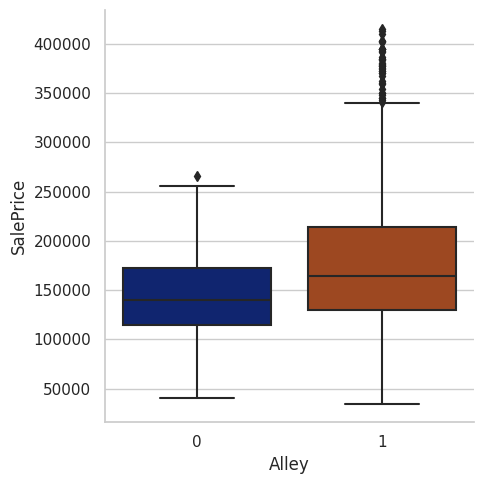

In [293]:
palette_color = sns.color_palette('bright')
sns.catplot(y="SalePrice",
            data=house_price_df,
            kind="box",
            x="Alley",
            palette=sns.color_palette("dark",2)
           )
plt.show();

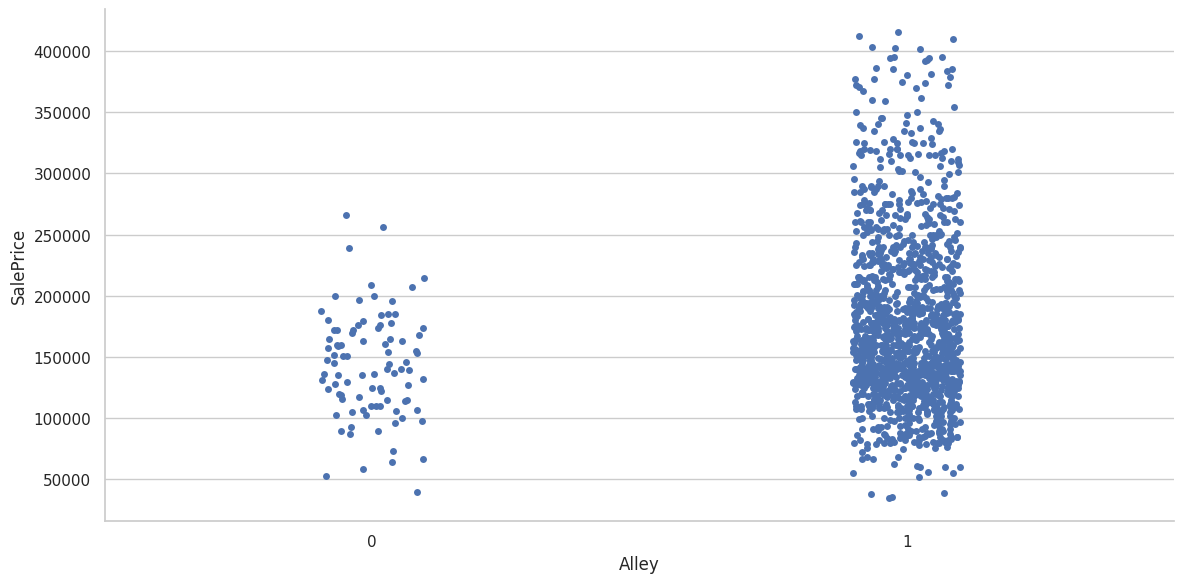

In [294]:
sns.catplot(data=house_price_df, 
            x="Alley",
            y="SalePrice", 
            height=6, 
            aspect=2)
plt.show()


In [295]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ Alley",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups


,sum_sq,df,F,PR(>F)
Alley,105784973100.79,1.00,23.60,0.00
Residual,6436864313083.99,1436.00,NaN,NaN


## it is the same thing we'd better delete it

In [296]:
house_price_df.drop("Alley",axis=1,inplace=True)

# we have lots of categorical features without missing any extra time We must find a shortcut to deal with them 

In [297]:
#numerical and categorical features
numerical_types=["float64","float32","int64","int32"]
num_col=[col for col in house_price_df.columns if house_price_df[col].dtype in numerical_types]
categ_col=[col for col in house_price_df.columns if house_price_df[col].dtype not in numerical_types]

#let me print them 
print(f"all numerical columns are ->\n {num_col}")
print("-"*100)
print(f"all categorical columns are ->\n {categ_col}")


all numerical columns are ->
 ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'totall_number_of_bathrooms']
----------------------------------------------------------------------------------------------------
all categorical columns are ->
 ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',

# now i will explain what i will do first of all i will select all important feature by hand and than i will try to use the models that in sklearn.model_selection to ensure the validity of our choices


## let's start with numerical featurs using spearman

#### first i will see if this feature who has some null values is important i will tread it 

In [298]:
house_price_df[num_col].isna().sum()

Id                              0
LotFrontage                   257
LotArea                         0
OverallQual                     0
OverallCond                     0
YearBuilt                       0
YearRemodAdd                    0
MasVnrArea                      7
BsmtFinSF1                      0
BsmtFinSF2                      0
BsmtUnfSF                       0
TotalBsmtSF                     0
1stFlrSF                        0
2ndFlrSF                        0
LowQualFinSF                    0
GrLivArea                       0
BsmtFullBath                    0
BsmtHalfBath                    0
FullBath                        0
HalfBath                        0
BedroomAbvGr                    0
KitchenAbvGr                    0
TotRmsAbvGrd                    0
Fireplaces                      0
GarageYrBlt                    81
GarageCars                      0
GarageArea                      0
WoodDeckSF                      0
OpenPorchSF                     0
EnclosedPorch 

In [299]:
def num_feature_selection(data,num_features,target,min_limit_corr):
    # here i will store my important feature 
    important_features={}

    # i will store all features who has null values in them to treat them later
    null_features=[]
    # here is the loop func. To experience every feature
    for i in num_features:
        # if the feature has null values in it i will store it and i will not do ant thing else(continure)
        if data[i].isna().sum()>0:
            null_features.append(i)
            continue

        # Calculate Spearman correlation   
        spearman_corr, _ = stats.spearmanr(data[i], data[target])
        if spearman_corr*100>=min_limit_corr:
            important_features[i]=np.round(spearman_corr,3)
    return important_features,null_features

# İ divieded the feature to important features and to null features who has null values in them to treat them later
important_features,null_features=num_feature_selection(house_price_df,num_col,"SalePrice",40)
print(f"all the important feature that i want to build a good model are --> {important_features}\n and the number of important features is {len(important_features)-1}")
print(f"all the features who have null values in them are --> {null_features}")
del important_features["SalePrice"]

all the important feature that i want to build a good model are --> {'LotArea': 0.437, 'OverallQual': 0.801, 'YearRemodAdd': 0.562, 'TotalBsmtSF': 0.586, '1stFlrSF': 0.558, 'GrLivArea': 0.72, 'FullBath': 0.627, 'TotRmsAbvGrd': 0.514, 'Fireplaces': 0.507, 'GarageCars': 0.677, 'GarageArea': 0.636, 'OpenPorchSF': 0.469, 'SalePrice': 1.0, 'totall_number_of_bathrooms': 0.681}
 and the number of important features is 13
all the features who have null values in them are --> ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [300]:
important_features.keys()

dict_keys(['LotArea', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'totall_number_of_bathrooms'])

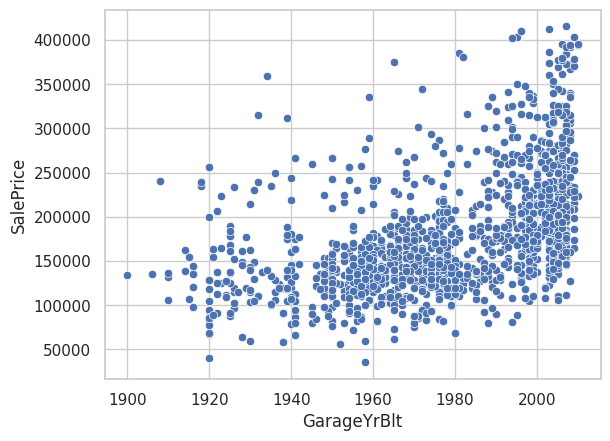

In [301]:
house_price_df.drop("LotFrontage",axis=1,inplace=True)
sns.scatterplot(data=house_price_df,
                x="GarageYrBlt",
                y="SalePrice"
               )
plt.show()
house_price_df.drop("GarageYrBlt",axis=1,inplace=True)


### split the data to train and test

In [302]:
# the most important features which have 50 and more importance with the target
X_train_num=house_price_df[list(important_features.keys())]
# the target
y_train_num=house_price_df[["SalePrice"]]

## i think it is time to use advanced techniques to select the most important numberical features

## definitely there are other ways to do that like [generical univariate select,percentile select and select from model]

In [303]:
classes=[f_regression,f_classif,chi2]
# i will append all number of columns to filter them later
num_of_features=[]
for i in range(len(classes)):
    selector= SelectKBest(score_func=classes[i],k=5)
    selector.fit(X_train_num[list(important_features.keys())],y_train_num)
    best_num_cols=selector.get_support(indices=True)
    num_of_features.append(best_num_cols)
    print(f"the indexes of the best features using {classes[i].__name__} are: {best_num_cols}")

# i will take all the important features that the 3 classes gave me 
filtered_col=[]
for i in range(len(num_of_features)):
    for ind_col in num_of_features[i]:
        if ind_col not in filtered_col:
            filtered_col.append(ind_col)
        else:
            pass

print(f"\n the all important featuers using {len(classes)} classes to build the model are: {filtered_col}")

the indexes of the best features using f_regression are: [ 1  5  9 10 12]
the indexes of the best features using f_classif are: [ 1  5  6  9 12]
the indexes of the best features using chi2 are: [ 3  4  5 10 11]

 the all important featuers using 3 classes to build the model are: [1, 5, 9, 10, 12, 6, 3, 4, 11]


In [304]:
X_train_num=X_train_num.iloc[:,filtered_col]
X_train_num.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,totall_number_of_bathrooms,FullBath,TotalBsmtSF,1stFlrSF,OpenPorchSF
998,3,1077,1,210,1,1,1007,1077,100
1226,6,1933,3,668,3,2,894,894,18
1261,5,1050,1,338,1,1,1050,1050,0
1073,6,1426,2,440,2,1,690,698,0
1365,7,1674,2,663,4,2,814,814,96


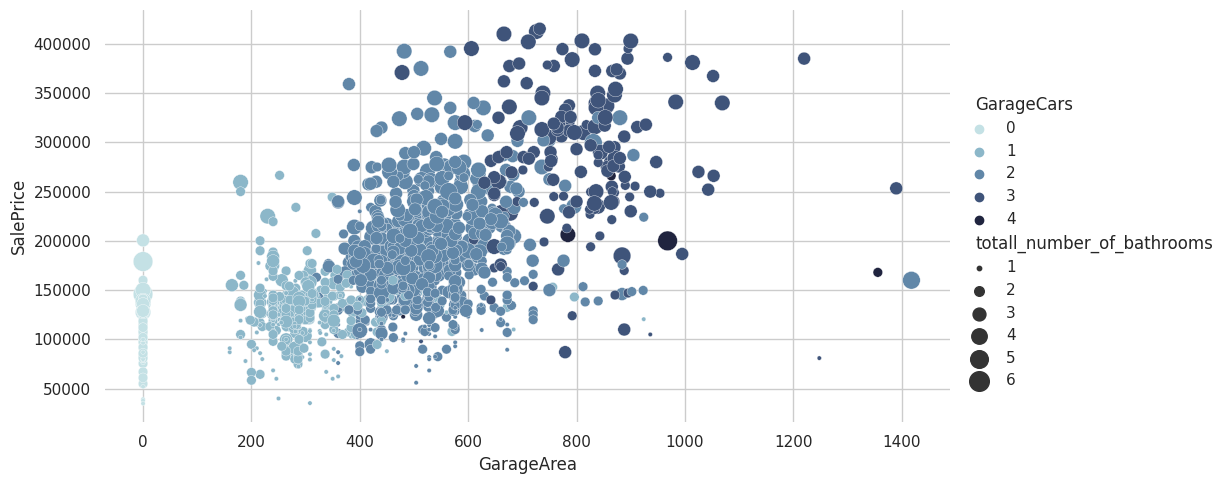

In [305]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=house_price_df,
    x="GarageArea", y="SalePrice",
    hue="GarageCars", size="totall_number_of_bathrooms",
    palette=cmap, 
    sizes=(10,200),
    height=5,
    aspect=2,
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

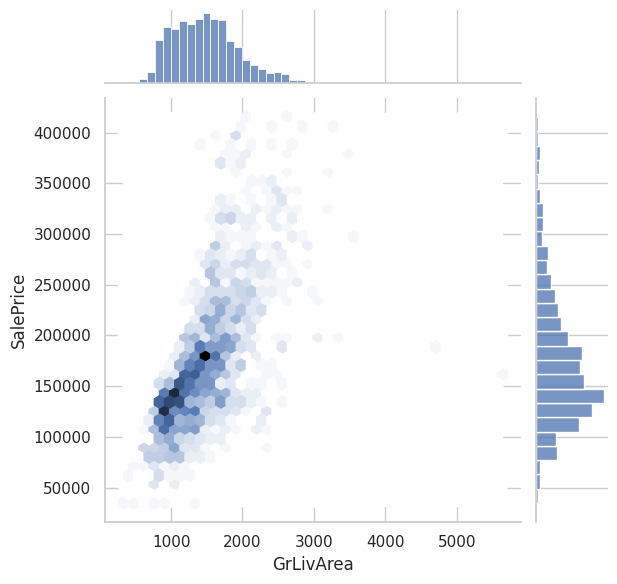

In [306]:
sns.jointplot(data=house_price_df, 
              x="GrLivArea",
              y="SalePrice", 
              kind="hex"
             )
plt.show()

## let us use Select from model class from feature_selection module

In [307]:
this_model=RandomForestRegressor(n_estimators=30,n_jobs=-1,max_depth=10)
sel=SelectFromModel(estimator=this_model)
sel.fit(X_train_num,y_train_num)
selected_featuers=sel.transform(X_train_num)
print(sel.get_support(indices=True))

[0 1]


In [308]:
px.scatter_3d(data_frame=house_price_df, 
              x="OverallQual", 
              y="GrLivArea",
              z="SalePrice",
              color="Fireplaces",
              title="3D Scatter Plot",
              labels={
                  "OverallQual": "Overall Quality",
                  "GrLivArea": "Above Ground Living Area",
                  "SalePrice": "Sale Price",
                  "Fireplaces": "Number of Fireplaces"
              }
             )

#plt.show()

## another way to show 3D plot but the above one is better than this

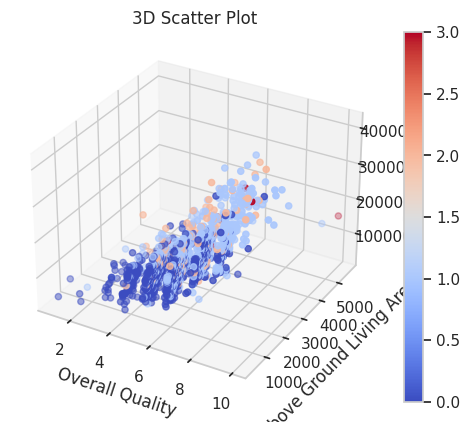

In [309]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap
cmap = plt.get_cmap("coolwarm")

# Plot the values
sc = ax.scatter(house_price_df['OverallQual'], 
                house_price_df['GrLivArea'], 
                house_price_df['SalePrice'], 
                c=house_price_df['Fireplaces'],
                cmap=cmap
               )

# Set labels
ax.set_xlabel('Overall Quality')
ax.set_ylabel('Above Ground Living Area')
ax.set_zlabel('Sale Price')

# Add a color bar
plt.colorbar(sc)

# Set title
plt.title('3D Scatter Plot')

plt.show()


# at the end i will try to build the model just using numerical features

# reset numerical features

In [310]:
X_train_num=X_train_num.iloc[:,sel.get_support(indices=True)]

# EDA some categorical features

### HouseStyle: Style of dwelling

In [311]:
HouseStyle_value_counts=house_price_df["HouseStyle"].value_counts()
HouseStyle_value_counts

HouseStyle
1Story    718
2Story    432
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64

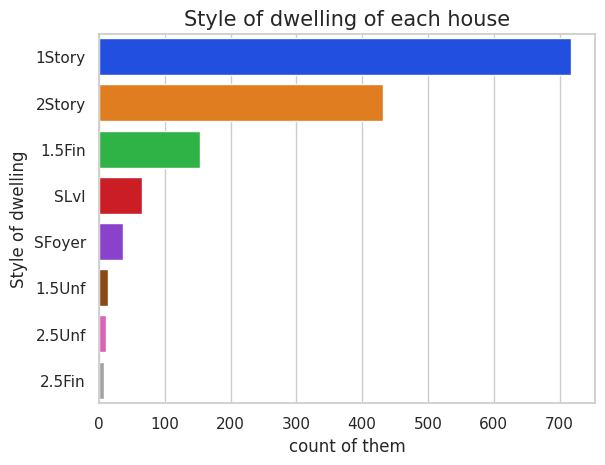

In [312]:
palette_color = sns.color_palette('bright')
ax=sns.barplot(y=HouseStyle_value_counts.index,
            x=HouseStyle_value_counts.values,
            palette=palette_color,
           )
ax.set_xlabel("count of them",fontsize=12)
ax.set_ylabel("Style of dwelling",fontsize=12)
ax.set_title("Style of dwelling of each house",fontsize=15)
plt.show()

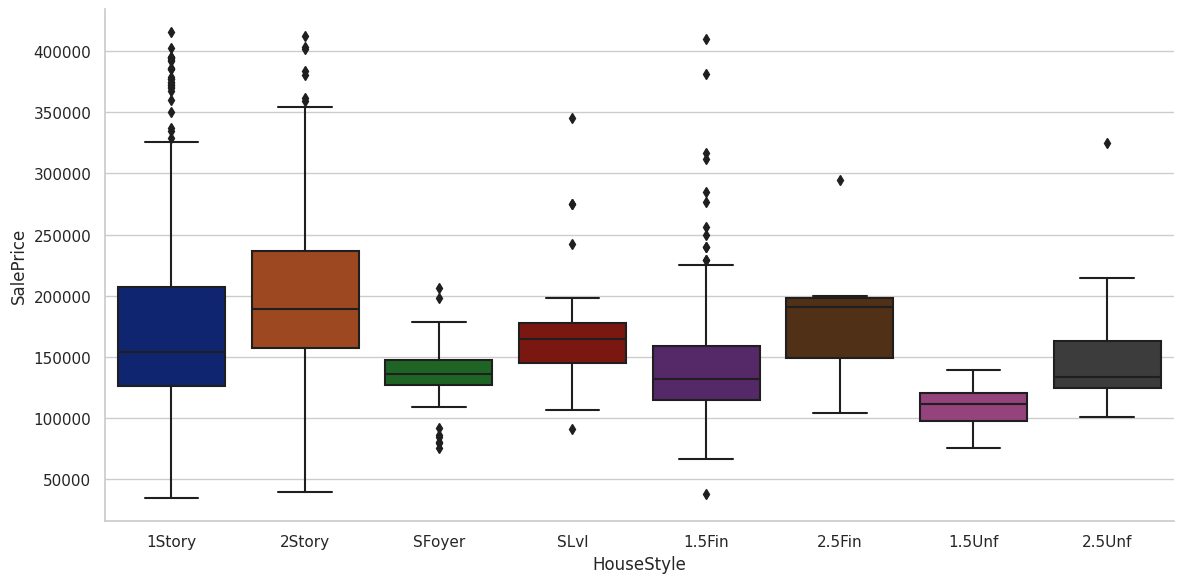

In [313]:
palette_color = sns.color_palette('dark')
sns.catplot(y="SalePrice",
            data=house_price_df,
            kind="box",
            x="HouseStyle",
            palette=palette_color,
            height=6, aspect=2
           )
plt.show();

In [314]:
house_price_df.groupby("HouseStyle")["SalePrice"].mean()

HouseStyle
1.5Fin   143116.74
1.5Unf   110150.00
1Story   172524.32
2.5Fin   183571.43
2.5Unf   157354.55
2Story   200371.54
SFoyer   135074.49
SLvl     166703.38
Name: SalePrice, dtype: float64

## BldgType: Type of dwelling


In [315]:
BldgType_value_counts=house_price_df["BldgType"].value_counts()
BldgType_value_counts

BldgType
1Fam      1198
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

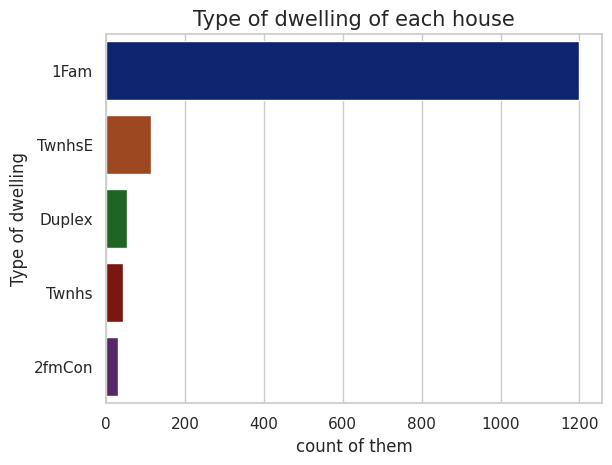

In [316]:
palette_color = sns.color_palette('dark')
ax=sns.barplot(y=BldgType_value_counts.index,
            x=BldgType_value_counts.values,
            palette=palette_color,
           )
ax.set_xlabel("count of them",fontsize=12)
ax.set_ylabel("Type of dwelling",fontsize=12)
ax.set_title("Type of dwelling of each house",fontsize=15)
plt.show()

## drawing the plot using count of categories in 2 features

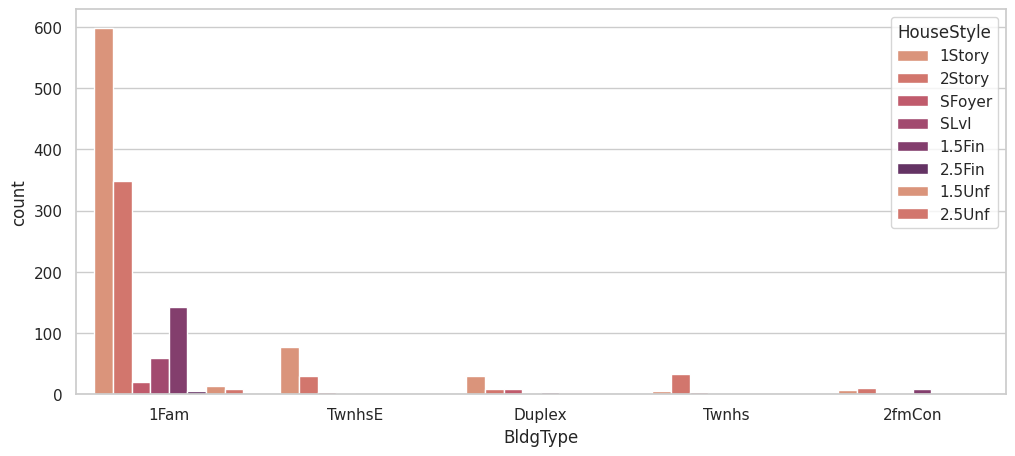

In [317]:
palette_color = sns.color_palette('flare')

plt.figure(figsize=(12,5))
sns.countplot(data=house_price_df,
              x="BldgType",
              hue="HouseStyle",
              palette=palette_color
             )
plt.show()

## drawing the plot using average home price for categories in two features

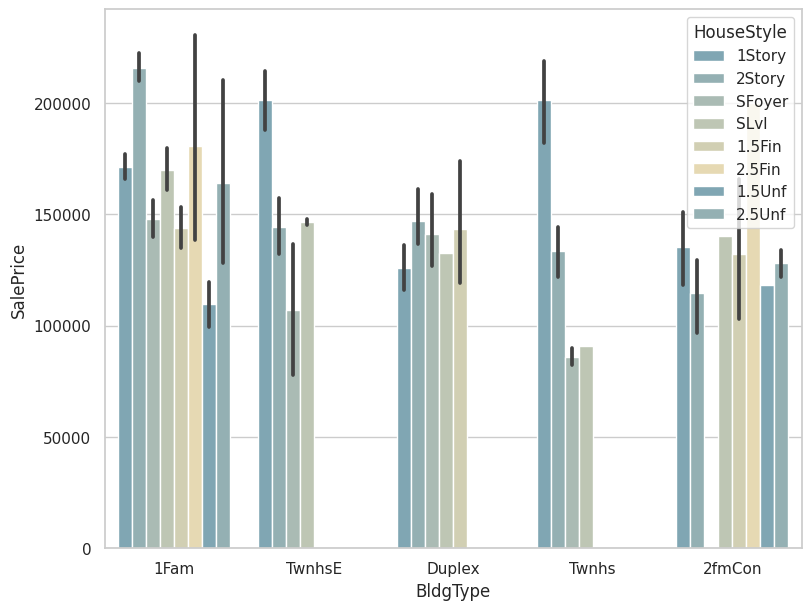

In [318]:
palette_color=sns.color_palette("blend:#7AB,#EDA")
plt.figure(figsize=(9,7))
sns.barplot(data=house_price_df,
            x="BldgType",
            y="SalePrice",
            hue="HouseStyle",
            palette=palette_color
           )
plt.show()


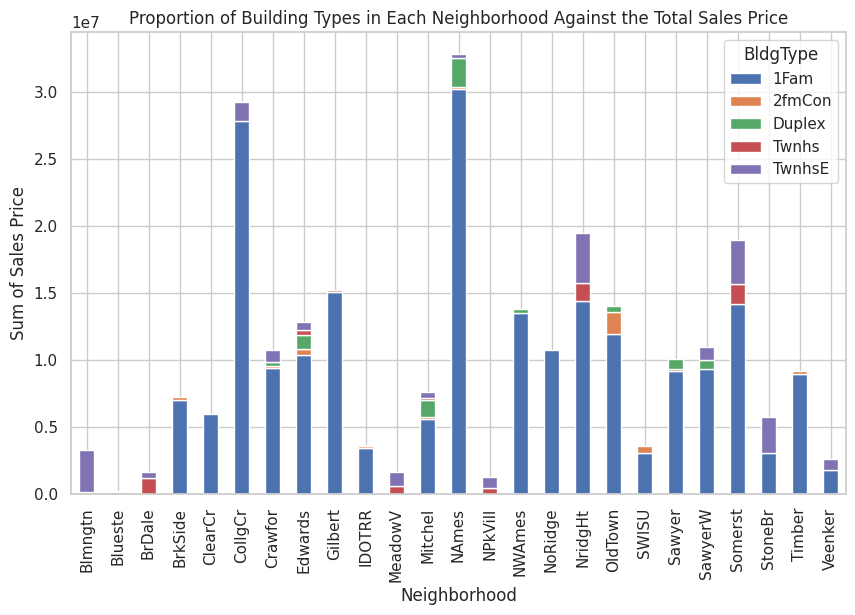

In [319]:

# Group the data by neighborhood and building type and sum the sales price
grouped_data = house_price_df.groupby(["Neighborhood", "BldgType"])["SalePrice"].sum()

# Unstack the grouped data to create a dataframe with building type as columns
unstacked_data = grouped_data.unstack()

# Plot the unstacked data as a bar graph with stacked bars
unstacked_data.plot(kind="bar",
                    stacked=True,
                    figsize=(10, 6)
                   )

# Add labels and title to the graph
plt.xlabel("Neighborhood")
plt.ylabel("Sum of Sales Price")
plt.title("Proportion of Building Types in Each Neighborhood Against the Total Sales Price")

# Show the graph
plt.show()


In [320]:
X_train_categ=house_price_df[categ_col]
y_train=y_train_num
X_train_categ.head()

,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
998,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,BrkTil,TA,Fa,No,Unf,Unf,GasA,Fa,N,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,P,NaN,NaN,NaN,WD,Normal
1226,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1261,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1073,IR1,Bnk,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,Hip,CompShg,HdBoard,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1365,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# filtering the categorical features using ANOVA

In [321]:
def select_features_categ_using_ANOVA(data,cat_features,target_name,min_limit_F):
    col_categ=cat_features.columns
    index_of_selected_categ_features=[]
    selected_categ_features={}
    all_ANOVA_values={}
    for i_feature in range(len(col_categ)):
        feature=col_categ[i_feature]
        # Fit the model
        model = ols(f'{target_name} ~ {feature}', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        f_value = anova_table.loc[feature, 'F']
        all_ANOVA_values[feature]=f_value
        if f_value>=min_limit_F:
            selected_categ_features[feature]=f_value
            index_of_selected_categ_features.append(i_feature)
    return index_of_selected_categ_features,all_ANOVA_values,selected_categ_features
min_limit_F=int(input("min_limit_F:"))
index_of_selected_categ_features,all_ANOVA_values,selected_categ_features=select_features_categ_using_ANOVA(house_price_df,
                                                                                    X_train_categ,
                                                                                    "SalePrice",
                                                                                    min_limit_F
                                                                                   )
selected_categ_features=dict(sorted(selected_categ_features.items(), key=lambda item: item[1]))
all_ANOVA_values=dict(sorted(all_ANOVA_values.items(), key=lambda item: item[1]))

print(f"all categorical features anova values with the target:\n {all_ANOVA_values}\n")
print(f": the indxes of all important categorical features:\n {index_of_selected_categ_features}\n")
print(f": the names and the ANOVA values of all important categoricl features are:\n {selected_categ_features}")

min_limit_F: 60


all categorical features anova values with the target:
 {'PoolQC': 0.12283177483106002, 'Utilities': 0.3230035200701349, 'BsmtFinType2': 2.053869609838009, 'MiscFeature': 2.1573240206469557, 'RoofMatl': 2.2329227493928197, 'Condition2': 2.780739120899732, 'LandSlope': 3.0226810741425836, 'Functional': 4.998821186356856, 'Heating': 5.23729553157235, 'LotConfig': 5.931657551916921, 'Fence': 7.069604428340729, 'Condition1': 8.091864456646373, 'ExterCond': 11.022208673955511, 'RoofStyle': 11.335135817677537, 'GarageCond': 11.58563492078127, 'GarageQual': 11.77983811167094, 'BldgType': 14.465841348424098, 'LandContour': 14.565120122029336, 'BsmtCond': 17.749138043584782, 'Exterior2nd': 19.227464413337763, 'HouseStyle': 19.281827423697706, 'FireplaceQu': 20.996329616402818, 'Exterior1st': 21.65101419837248, 'SaleType': 22.69916702959396, 'MasVnrType': 26.321567478038038, 'Electrical': 27.470579214015252, 'LotShape': 37.148056094184604, 'SaleCondition': 37.48964327755485, 'PavedDrive': 49.772

# the most important categorical features are down:
## Foundation:Type of foundation
## GarageFinish: Interior finish of the garage
## BsmtQual: Height of the basement
## KitchenQual: Kitchen quality
## ExterQual: Exterior material quality


In [322]:
X_train_categ=X_train_categ.iloc[:,index_of_selected_categ_features]
X_train_categ.head()

,Neighborhood,ExterQual,Foundation,BsmtQual,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageType,GarageFinish
998,IDOTRR,TA,BrkTil,TA,Unf,Fa,N,TA,Detchd,Unf
1226,Somerst,Gd,PConc,Gd,Unf,Ex,Y,Gd,BuiltIn,Fin
1261,NAmes,TA,CBlock,TA,Rec,Gd,Y,TA,Attchd,Unf
1073,Edwards,TA,CBlock,TA,BLQ,TA,Y,TA,Attchd,Fin
1365,Somerst,Gd,PConc,Gd,GLQ,Ex,Y,Gd,Attchd,RFn


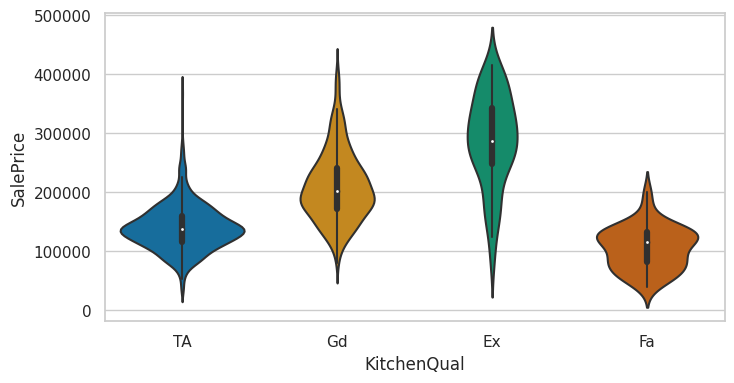

In [323]:

palette=sns.color_palette("colorblind")
plt.figure(figsize=(8,4))
sns.violinplot(data=house_price_df,
               x="KitchenQual",
               y="SalePrice",
               palette=palette
              )
plt.show()

## Let's check if the categorical features have null values

In [324]:
X_train_categ.isna().sum()/house_price_df.shape[0]*100 #percentage

Neighborhood   0.00
ExterQual      0.00
Foundation     0.00
BsmtQual       2.57
BsmtFinType1   2.57
HeatingQC      0.00
CentralAir     0.00
KitchenQual    0.00
GarageType     5.63
GarageFinish   5.63
dtype: float64

# i will try to do random forest without encoding the label,we can not do it in sklearn

In [325]:
df=np.c_[X_train_num,X_train_categ,y_train]
df = pd.DataFrame(df)
number_of_columns=df.shape[1]
x_tr=df.drop(number_of_columns-1,axis=1)
y_tr=df[number_of_columns-1]
# Convert pandas dataframe to h2o frame
df = h2o.H2OFrame(df)

# Define model
model = H2ORandomForestEstimator(ntrees=30, max_depth=20, nfolds=5)

# Convert pandas Index to list
x_columns = X_train_categ.columns.tolist()

# Train model
model.train(x=list(range(0,number_of_columns-1)), y=number_of_columns-1, training_frame=df)
cv_summary = model.cross_validation_metrics_summary().as_data_frame()
cv_summary

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,18229.26,758.75,17699.79,19315.53,17715.62,18745.16,17670.22
1,mean_residual_deviance,688702530.00,72007072.00,618235140.00,802896380.00,645094660.00,709045820.00,668240640.00
2,mse,688702530.00,72007072.00,618235140.00,802896380.00,645094660.00,709045820.00,668240640.00
3,r2,0.85,0.02,0.85,0.81,0.86,0.84,0.87
4,residual_deviance,688702530.00,72007072.00,618235140.00,802896380.00,645094660.00,709045820.00,668240640.00
5,rmse,26215.35,1350.03,24864.33,28335.43,25398.72,26627.91,25850.35
6,rmsle,0.15,0.01,0.14,0.16,0.14,0.15,0.15


## now i should process the categorical data from nulls

## for that i will impute the missing values by the most frequent value
## Alternatively I can build a model to predict them if their number is high

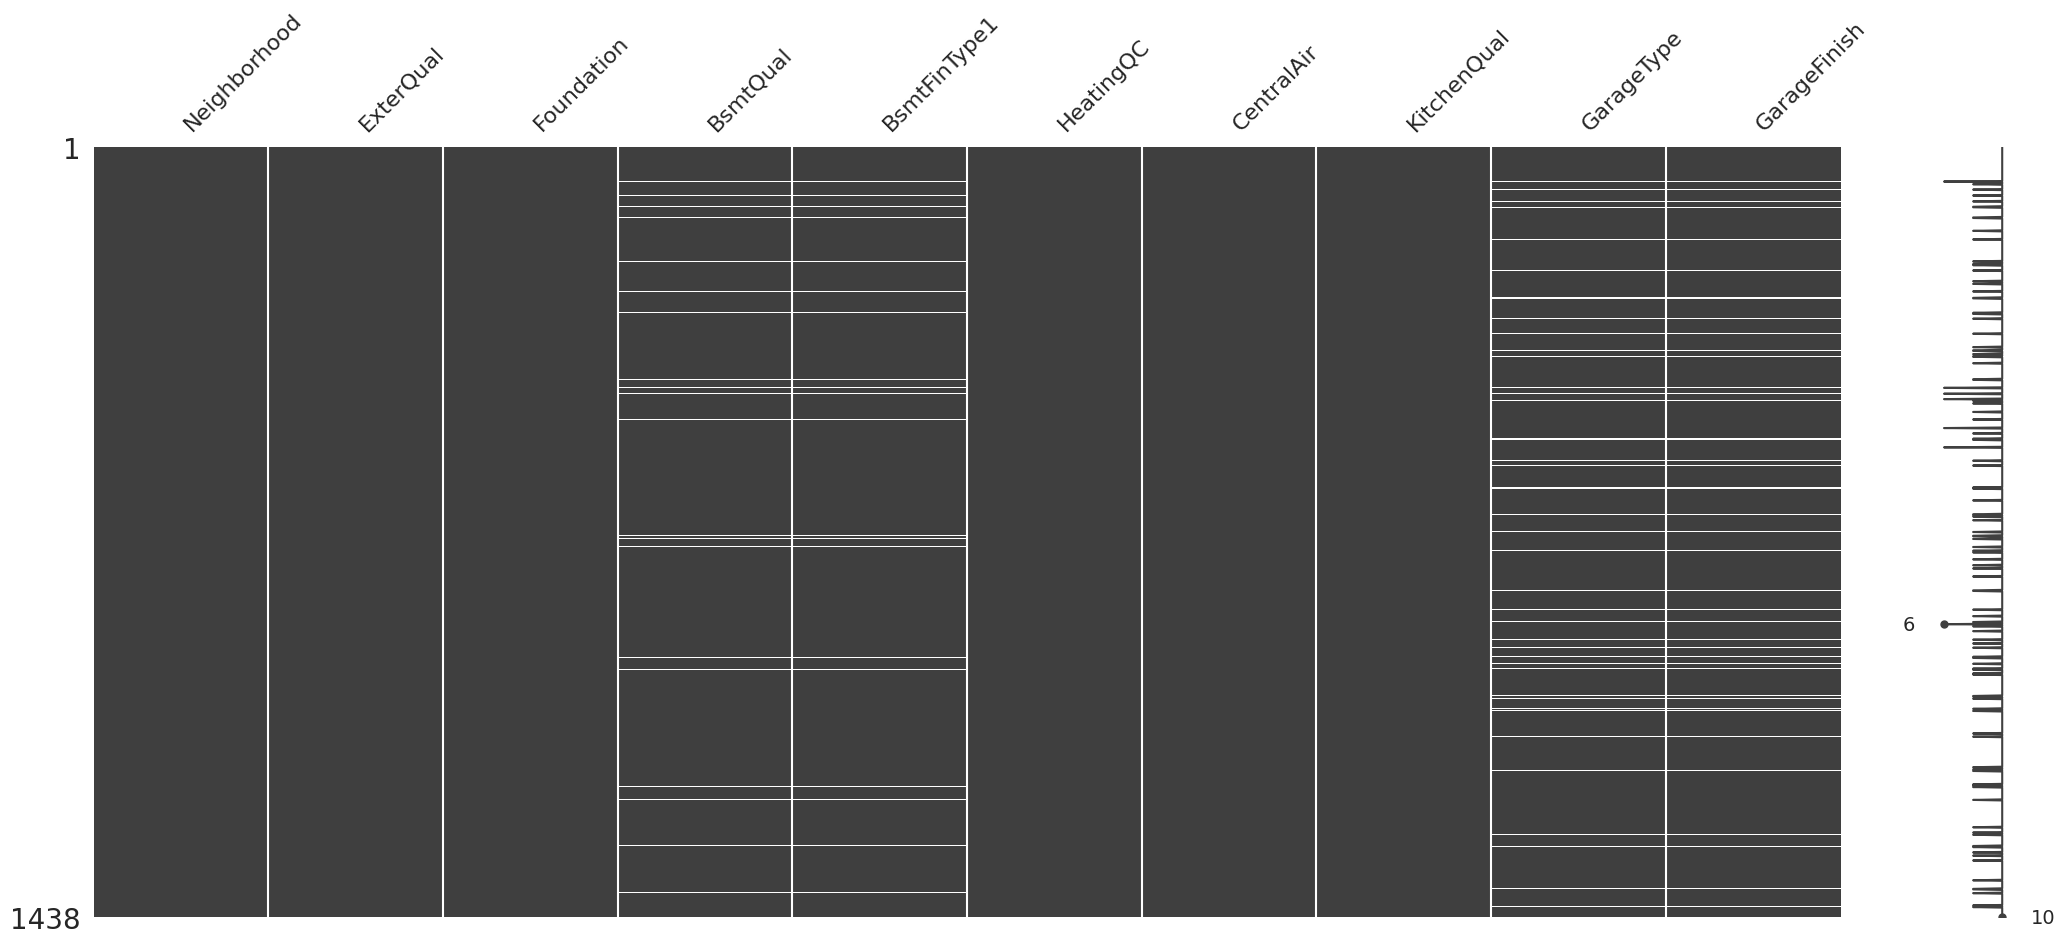

In [326]:
msno.matrix(X_train_categ)
plt.show()

## i thought that there was a correletion with missing values but it is not so well

In [327]:
new_feature_BsmtQual= np.where(house_price_df['BsmtQual'].isnull(), "1", "0")
new_feature_BsmtQual

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [328]:
house_price_df["BsmtQual_new"]=new_feature_BsmtQual

In [329]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ BsmtQual_new",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups


,sum_sq,df,F,PR(>F)
BsmtQual_new,187108335289.88,1.00,42.28,0.00
Residual,6355540950894.90,1436.00,NaN,NaN


In [330]:
new_feature_GarageType= np.where(house_price_df['GarageType'].isnull(), "1", "0")
new_feature_GarageType

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [331]:
house_price_df["GarageType_new"]=new_feature_BsmtQual

In [332]:
# H0(null hypothesis):the means of the different groups are the same:
# H1(alternative hypothesis):at least one sample mean is not equal to the others

mod=ols("SalePrice ~ GarageType_new",data=house_price_df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table
#	PR(>F)=p_value and it is less than 0.5 so we accept the H1 that means there are significant between the groups


,sum_sq,df,F,PR(>F)
GarageType_new,187108335289.88,1.00,42.28,0.00
Residual,6355540950894.90,1436.00,NaN,NaN


In [333]:
missing_cols = X_train_categ.columns[X_train_categ.isna().any()]
missing_cols

Index(['BsmtQual', 'BsmtFinType1', 'GarageType', 'GarageFinish'], dtype='object')

# splitting the test data

In [334]:
X_test_num=test_data[X_train_num.columns.tolist()]
X_test_categ=test_data[X_train_categ.columns.tolist()]

# I'll use Pipeline to process the data and avoiding data leakage

# categorical data

In [335]:
categ_pipeline=Pipeline(steps=[("imputer_top",SimpleImputer( missing_values=np.nan,
                                                     strategy="most_frequent")
                       ),
                       ("OHE", OneHotEncoder(sparse=False))
                      ]
                     )
categ_pipeline.fit(X_train_categ)
X_train_categ=categ_pipeline.transform(X_train_categ)
X_test_categ=categ_pipeline.transform(X_test_categ)

In [336]:
print(f"the number of nulls in train data after processing the data: {np.sum(np.isnan(X_train_categ))}")
print(f"the number of nulls in test data after processing the data: {np.sum(np.isnan(X_test_categ))}")

the number of nulls in train data after processing the data: 0
the number of nulls in test data after processing the data: 0


In [337]:
connected_num_categ_train=np.c_[X_train_num,X_train_categ]
connected_num_categ_test=np.c_[X_test_num,X_test_categ]
X_train=connected_num_categ_train
X_test=connected_num_categ_test

# all data

In [338]:
num_pipeline=Pipeline(steps=[("imputer_mean",SimpleImputer(missing_values=np.nan,
                                                     strategy="mean")
                       ),
                       ("std_scaler", StandardScaler())
                      ]
                     )

num_pipeline.fit(X_train)
X_train=num_pipeline.transform(X_train)
X_test=num_pipeline.transform(X_test)

# building the model

# first i will build some model from weakest to strongest and do some hyperparameter tuning and then i will callect them all in a class(using OOP)

## Least squares

In [339]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [340]:
print(dir(sl))

['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'GammaRegressor', 'Hinge', 'Huber', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'Log', 'LogisticRegression', 'LogisticRegressionCV', 'ModifiedHuber', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveClassifier', 'PassiveAggressiveRegressor', 'Perceptron', 'PoissonRegressor', 'QuantileRegressor', 'RANSACRegressor', 'Ridge', 'RidgeCV', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SGDOneClassSVM', 'SGDRegressor', 'SquaredLoss', 'TheilSenRegressor', 'TweedieRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_bayes', '_cd_fast', '_coordinate_descent', '_glm', '_huber', '_least_angle', '_linear_loss', '_logistic', '_omp', '_passiv

### high overfitting

In [341]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg_pred=cross_val_predict(estimator=lin_reg,X=X_train, y=y_train,n_jobs=-1,cv=5)

lin_reg_r2_score=r2_score(y_train,lin_reg_pred)
lin_reg_RMSE=mean_squared_error(y_train,lin_reg_pred,squared=False)
lin_reg_MEE=mean_absolute_error(y_train,lin_reg_pred)

print(f"R2 score={lin_reg_r2_score}")
print(f"RMSE={lin_reg_RMSE}")
print(f"MEE={lin_reg_MEE}")

y_pred_ov=lin_reg.predict(X_train)
X_r2_score=r2_score(y_train,y_pred_ov)
print(f"the R2 score using x_trian={X_r2_score}")

R2 score=-1.050460395516693e+24
RMSE=6.913328903585909e+16
MEE=2093475793587714.8
the R2 score using x_trian=0.8376244459745793


## stochastic G.D.

In [342]:
def evaluation(model,X_train,y_train,y_pred):
    R2_score=r2_score(y_train,y_pred)
    RMSE=mean_squared_error(y_train,y_pred,squared=False)
    MAE=mean_absolute_error(y_train,y_pred)

    print(f"R2 score={R2_score}")
    print(f"RMSE={RMSE}")
    print(f"MAE={MAE}\n")
    y_pred_ov=model.predict(X_train)
    X_r2_score=r2_score(y_train,y_pred_ov)
    print(f"the R2 score using x_trian={X_r2_score}")

In [343]:
y_train_raveled= np.asanyarray(y_train).ravel()
lin_reg_stoch=SGDRegressor(loss="squared_error",penalty="l2",alpha=0.7, eta0=0.001, max_iter=1000,power_t=0.40)
lin_reg_stoch.fit(X_train,y_train_raveled)
lin_reg_stoch_pred=cross_val_predict(estimator=lin_reg_stoch,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{lin_reg_stoch.__class__.__name__}\n")
evaluation(lin_reg_stoch,X_train,y_train_raveled,lin_reg_stoch_pred)

SGDRegressor

R2 score=0.7900498462676929
RMSE=30906.902059078577
MEE=21151.0253210877

the R2 score using x_trian=0.804262858869544


## polynomial regression

### high overfitting

In [344]:
poly_feat=PolynomialFeatures(degree=2,include_bias=False)  #include_bias:
poly_feat.fit(X_train)
x_poly=poly_feat.transform(X_train)
lin_reg_poly=LinearRegression()
lin_reg_poly.fit(x_poly,y_train_raveled) 

poly_pred=cross_val_predict(estimator=lin_reg_poly,X=x_poly, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{lin_reg_poly.__class__.__name__}\n")
evaluation(lin_reg_poly,x_poly,y_train,poly_pred)

LinearRegression

R2 score=-2.4352403156014383e+19
RMSE=332865120647267.5
MEE=58148466150382.27

the R2 score using x_trian=0.950100305682832


## Lasso and Ridge

In [345]:
y_train_raveled= np.asanyarray(y_train).ravel()
lin_reg_Ridge=Ridge()
lin_reg_Ridge.fit(X_train,y_train_raveled)
lin_reg_Ridge_pred=cross_val_predict(estimator=lin_reg_Ridge,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{lin_reg_Ridge.__class__.__name__}\n")
evaluation(lin_reg_Ridge,X_train,y_train_raveled,lin_reg_Ridge_pred)

Ridge

R2 score=0.8179395797378693
RMSE=28780.951515653644
MEE=19604.174349130368

the R2 score using x_trian=0.837635082896568


In [346]:
y_train_raveled= np.asanyarray(y_train).ravel()
lin_reg_Lasso=Lasso(max_iter=10000,alpha=5.0)
lin_reg_Lasso.fit(X_train,y_train_raveled)
lin_reg_Lasso_pred=cross_val_predict(estimator=lin_reg_Lasso,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{lin_reg_stoch.__class__.__name__}\n")
evaluation(lin_reg_Lasso,X_train,y_train_raveled,lin_reg_Lasso_pred)

SGDRegressor

R2 score=0.8179577483243418
RMSE=28779.515392821173
MEE=19599.260048173102

the R2 score using x_trian=0.837634856863927


# definitely we can do feature selection using Lasso regression

In [347]:
#X_train=X_train[:, lin_reg_Lasso.coef_ != 0]

## K Nearest Neighbor

In [348]:
print(dir(sn))

['BallTree', 'DistanceMetric', 'KDTree', 'KNeighborsClassifier', 'KNeighborsRegressor', 'KNeighborsTransformer', 'KernelDensity', 'LocalOutlierFactor', 'NearestCentroid', 'NearestNeighbors', 'NeighborhoodComponentsAnalysis', 'RadiusNeighborsClassifier', 'RadiusNeighborsRegressor', 'RadiusNeighborsTransformer', 'VALID_METRICS', 'VALID_METRICS_SPARSE', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ball_tree', '_base', '_classification', '_distance_metric', '_graph', '_kd_tree', '_kde', '_lof', '_nca', '_nearest_centroid', '_partition_nodes', '_quad_tree', '_regression', '_unsupervised', 'kneighbors_graph', 'radius_neighbors_graph', 'sort_graph_by_row_values']


In [349]:
k_neighbor_reg=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
k_neighbor_reg.fit(X_train,y_train_raveled)
k_neighbor_reg_pred=cross_val_predict(estimator=k_neighbor_reg,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{k_neighbor_reg.__class__.__name__}\n")
evaluation(k_neighbor_reg,X_train,y_train_raveled,k_neighbor_reg_pred)

KNeighborsRegressor

R2 score=0.7128836544775626
RMSE=36143.17796886027
MEE=25347.95507649513

the R2 score using x_trian=0.8165206141586518


# this algorithm is so awful

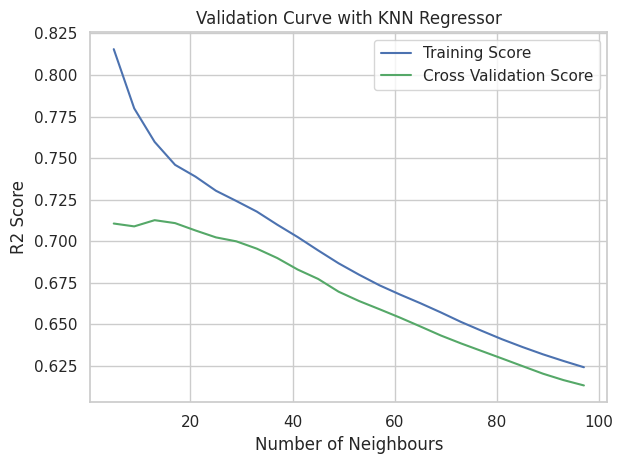

In [350]:
parameter_range = np.arange(5, 100, 4)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsRegressor(),X_train,y_train_raveled,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="r2")

                            
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
  
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')
 
# Creating the plot
plt.title("Validation Curve with KNN Regressor")
plt.xlabel("Number of Neighbours")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best') 
plt.show()

## Linear SVR

In [351]:
lin_svr_reg=LinearSVR(
    epsilon=0.0,
    C=1000,
    loss='epsilon_insensitive',
    dual=True,
    max_iter=1000,
)

lin_svr_reg.fit(X_train,y_train_raveled)
lin_svr_reg_pred=cross_val_predict(estimator=lin_svr_reg,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{lin_svr_reg.__class__.__name__}\n")
evaluation(lin_svr_reg,X_train,y_train_raveled,lin_svr_reg_pred)

LinearSVR

R2 score=0.794986721959634
RMSE=30541.360009507152
MEE=20011.901512286942

the R2 score using x_trian=0.8239744495898027


## None Linear SVR

### polynomial kernel

In [352]:
svr_poly_reg=SVR(kernel="poly",degree=2,C=600.0,coef0=5.0,epsilon=0.1)
svr_poly_reg.fit(X_train,y_train_raveled)
svr_poly_reg_pred=cross_val_predict(estimator=svr_poly_reg,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{svr_poly_reg.__class__.__name__}\n")
evaluation(svr_poly_reg,X_train,y_train_raveled,svr_poly_reg_pred)

SVR

R2 score=0.8092475256580407
RMSE=29459.981343493284
MEE=19701.63681428709

the R2 score using x_trian=0.8260095480357099


# hyperparameter tuning using GridSearchCV

In [353]:
c=np.geomspace(1000, 0.001, num=int(np.log10(1000/0.001)+1))
coef0=np.arange(1,5)
epsilon=np.geomspace(100, 0.01, num=int(np.log10(100/0.01)+1))
params_poly_svr={"C":c,
                 "epsilon":epsilon,
                 "coef0":coef0
                }
svr_poly_reg=SVR(kernel="poly",degree=2)
grid_svr = GridSearchCV(estimator=svr_poly_reg, 
                        param_grid=params_poly_svr, 
                        cv=5, 
                        n_jobs=-1, 
                        scoring='r2'
                       )

grid_svr.fit(X_train, y_train_raveled)

GridSearchCV(cv=5, estimator=SVR(degree=2, kernel='poly'), n_jobs=-1,
             param_grid={'C': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
                         'coef0': array([1, 2, 3, 4]),
                         'epsilon': array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02])},
             scoring='r2')

In [354]:
best_parms_svr = grid_svr.best_params_
print('Best Parameter using KNN -- ', best_parms_svr)

print('---'*30)

svr_best = grid_svr.best_estimator_
print('Best Estimaror using KNN -- ', svr_best)

print ('---' * 30)


## prediction

svr_poly_reg_pred=cross_val_predict(estimator=svr_best,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
evaluation(svr_best,X_train,y_train_raveled,svr_poly_reg_pred)

Best Parameter using KNN --  {'C': 1000.0, 'coef0': 4, 'epsilon': 100.0}
------------------------------------------------------------------------------------------
Best Estimaror using KNN --  SVR(C=1000.0, coef0=4, degree=2, epsilon=100.0, kernel='poly')
------------------------------------------------------------------------------------------
R2 score=0.8130966882325529
RMSE=29161.232520976584
MEE=19391.823318753122

the R2 score using x_trian=0.8320567876315417


# DecisionTreeRegressor

In [355]:
dec_tree_reg=DecisionTreeRegressor(max_depth=4, 
                                   criterion='squared_error',
                                   max_features=1.0,
                                   splitter="best"
                                  )
dec_tree_reg.fit(X_train, y_train_raveled)
dec_tree_reg_pred=cross_val_predict(estimator=dec_tree_reg,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{dec_tree_reg.__class__.__name__}\n")
evaluation(dec_tree_reg,X_train,y_train_raveled,dec_tree_reg_pred)

DecisionTreeRegressor

R2 score=0.7161097570923981
RMSE=35939.54798350787
MEE=26304.203312495072

the R2 score using x_trian=0.779590028777775


# Random Forest(bagging technique)

In [356]:
rand_forest_reg=RandomForestRegressor(n_estimators=100,
                                      max_depth=4,
                                      max_features=1.0,
                                      oob_score=True,
                                      n_jobs=-1
                                     )

rand_forest_reg.fit(X_train, y_train_raveled)
rand_forest_reg_pred=cross_val_predict(estimator=rand_forest_reg,X=X_train, y=y_train_raveled,n_jobs=-1,cv=5)
print(f"{rand_forest_reg.__class__.__name__}\n")
evaluation(rand_forest_reg,X_train,y_train_raveled,rand_forest_reg_pred)

RandomForestRegressor

R2 score=0.7785746566701152
RMSE=31740.300988979234
MEE=23029.20468702093

the R2 score using x_trian=0.8164308811799426


In [357]:
rand_forest_reg.feature_importances_

array([7.71205125e-01, 1.56078358e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.01332507e-04, 0.00000000e+00,
       6.62262666e-04, 4.94486099e-04, 8.70746320e-05, 1.83161863e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01438888e-04, 1.43296213e-03, 7.14126101e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01841406e-03, 0.00000000e+00, 1.06224701e-03,
       4.15931995e-05, 3.16710958e-04, 6.35508499e-04, 3.54683653e-04,
       6.32729684e-05, 4.52363194e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28009618e-02, 0.00000000e+00, 2.31978794e-03,
       2.06516594e-04, 2.61174052e-04, 0.00000000e+00, 2.56699252e-04,
       7.55929713e-05, 0.00000000e+00, 8.13500040e-03, 2.92268606e-04,
       1.77565435e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.35913545e-03, 5.63726379e-03, 4.05945958e-04, 0.00000000e+00,
      

## TheilSenRegressor

In [358]:
# Create a TheilSenRegressor
model_TheilSen =TheilSenRegressor(max_iter=3000,
    tol=0.1)
  
# Fit the model
model_TheilSen.fit(X_train, y_train_raveled)
model_TheilSen_pred = cross_val_predict(estimator=model_TheilSen, X=X_train, y=y_train_raveled, n_jobs=-1, cv=5)
print(f"{model_TheilSen.__class__.__name__}\n")
evaluation(model_TheilSen, X_train, y_train_raveled, model_TheilSen_pred)


TheilSenRegressor

R2 score=0.48098144027236334
RMSE=48594.69061956012
MEE=32112.616546234316

the R2 score using x_trian=0.5292350795731633


# HuberRegressor

In [359]:
# Create a model
model_Huber = HuberRegressor(epsilon=4,
    max_iter=10000,
    alpha=0.0001)
  
model_Huber.fit(X_train, y_train_raveled)
model_Huber_pred = cross_val_predict(estimator=model_Huber, X=X_train, y=y_train_raveled, n_jobs=-1, cv=5)
print(f"{model_Huber.__class__.__name__}\n")
evaluation(model_Huber, X_train, y_train_raveled, model_Huber_pred)

HuberRegressor

R2 score=0.8191383961536249
RMSE=28686.037796585337
MEE=19381.222969198414

the R2 score using x_trian=0.8351421814078062


# boosting techniques

## boosting:the general idea of most boosting methods is to train predictors "sequetially",each trying to correct its predecessor

In [360]:
adaboost_reg=AdaBoostRegressor(estimator=dec_tree_reg,
                               n_estimators=100,
                               learning_rate=0.5,
                               loss='linear'
                              )

adaboost_reg.fit(X_train, y_train_raveled)
adaboost_reg_pred = cross_val_predict(estimator=adaboost_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{adaboost_reg.__class__.__name__}\n")
evaluation(adaboost_reg, X_train, y_train_raveled, adaboost_reg_pred)

AdaBoostRegressor

R2 score=0.8028788481835807
RMSE=29947.73568895357
MEE=22209.862364331515

the R2 score using x_trian=0.8405290492428478


## hyperparameter tuning using GridSearchCV with AdaBoost

In [361]:
learning_rate=np.geomspace(1000, 0.001, num=int(np.log10(1000/0.001)+1))
n_estimators=np.arange(10,1000,50)
params_adaboost_reg={"learning_rate":learning_rate,
                 "n_estimators":n_estimators
                }

grid_adaboost_reg = GridSearchCV(estimator=adaboost_reg, 
                        param_grid=params_adaboost_reg, 
                        cv=5, 
                        n_jobs=-1, 
                        scoring='r2'
                       )

grid_adaboost_reg.fit(X_train, y_train_raveled)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4,
                                                                         max_features=1.0),
                                         learning_rate=0.5, n_estimators=100),
             n_jobs=-1,
             param_grid={'learning_rate': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             scoring='r2')

In [362]:
best_parms_adaboost_reg = grid_adaboost_reg.best_params_
print('Best Parameter using AdaBoost -- ', best_parms_adaboost_reg)

print('---'*30)

adaboost_reg_best = grid_adaboost_reg.best_estimator_
print('Best Estimaror using AdaBoost -- ', adaboost_reg_best)

print ('---' * 30)


## prediction

adaboost_reg_best_pred=cross_val_predict(estimator=adaboost_reg_best,
                                         X=X_train,
                                         y=y_train_raveled,
                                         n_jobs=-1,
                                         cv=5
                                        )
evaluation(adaboost_reg_best,X_train,y_train_raveled,adaboost_reg_best_pred)

Best Parameter using AdaBoost --  {'learning_rate': 1.0, 'n_estimators': 60}
------------------------------------------------------------------------------------------
Best Estimaror using AdaBoost --  AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4,
                                                  max_features=1.0),
                  n_estimators=60)
------------------------------------------------------------------------------------------
R2 score=0.8053325932881322
RMSE=29760.75873491198
MEE=22245.674370389548

the R2 score using x_trian=0.8445827691819001


## Gradient Boosting

In [363]:
gradient_boost_reg=GradientBoostingRegressor(learning_rate=0.1,
                                             n_estimators=100,
                                             max_depth=2,
                                             tol=0.0001,
                                             max_features=0.4
                                            )

gradient_boost_reg.fit(X_train, y_train_raveled)
gradient_boost_reg_pred = cross_val_predict(estimator=gradient_boost_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{gradient_boost_reg.__class__.__name__}\n")
evaluation(gradient_boost_reg, X_train, y_train_raveled,gradient_boost_reg_pred)

GradientBoostingRegressor

R2 score=0.8456198262521902
RMSE=26502.88426810646
MEE=19289.957948038405

the R2 score using x_trian=0.8754930691366124


## hyperparameter tuning using GridSearchCV with Gradient Boosting

In [364]:
learning_rate = np.geomspace(0.1, 0.001, num=int(np.log10(0.1/0.001)+1))
n_estimators = np.arange(10,1000,50)
params_gradient_boost_reg = {"learning_rate":learning_rate,
                             "n_estimators":n_estimators,
                            }

grid_gradient_boost_reg = GridSearchCV(estimator=GradientBoostingRegressor(), 
                                       param_grid=params_gradient_boost_reg, 
                                       cv=5, 
                                       n_jobs=-1, 
                                       scoring='r2'
                                      )

grid_gradient_boost_reg.fit(X_train, y_train_raveled)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1  , 0.01 , 0.001]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             scoring='r2')

In [365]:
best_parms_gradient_boost_reg = grid_gradient_boost_reg.best_params_
print('Best Parameter using Gradient Boosting -- ', best_parms_gradient_boost_reg)

print('---'*30)

gradient_boost_reg_best = grid_gradient_boost_reg.best_estimator_
print('Best Estimaror using Gradient Boosting -- ', gradient_boost_reg_best)

print ('---' * 30)


## prediction

gradient_boost_reg_best_pred=cross_val_predict(estimator=gradient_boost_reg_best,
                                         X=X_train,
                                         y=y_train_raveled,
                                         n_jobs=-1,
                                         cv=5
                                        )
evaluation(gradient_boost_reg_best,X_train,y_train_raveled,gradient_boost_reg_best_pred)

Best Parameter using Gradient Boosting --  {'learning_rate': 0.1, 'n_estimators': 360}
------------------------------------------------------------------------------------------
Best Estimaror using Gradient Boosting --  GradientBoostingRegressor(n_estimators=360)
------------------------------------------------------------------------------------------
R2 score=0.8547907981237596
RMSE=25703.629149645007
MEE=17910.231196206398

the R2 score using x_trian=0.9446376396196172


# XGBoost

In [366]:
xgb_reg=xgb.XGBRegressor(base_score=0.5,
                        booster="gbtree",
                        learning_rate=0.1,
                        max_depth=2,
                        n_jobs=-1,
                        n_estimators=100,
                        reg_alpha=0,
                        reg_lambda=100
                        )

xgb_reg.fit(X_train, y_train_raveled)
xgb_reg_pred = cross_val_predict(estimator=xgb_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{xgb_reg.__class__.__name__}\n")
evaluation(xgb_reg, X_train, y_train_raveled,xgb_reg_pred)

XGBRegressor

R2 score=0.8247969487218766
RMSE=28233.72693861678
MEE=20339.232204559285

the R2 score using x_trian=0.853531926597945


## hyperparameter tuning using GridSearchCV with XGBoost

In [367]:
learning_rate = np.geomspace(0.1, 0.001, num=int(np.log10(0.1/0.001)+1))
gamma=[-100,100,50]
min_child_weight=np.arange(1,5)
n_estimators = np.arange(10,300,50)
params_xgb_reg = {"learning_rate":learning_rate,
                             "n_estimators":n_estimators,
                             "gamma":gamma,
                             "min_child_weight":min_child_weight,
                             
                             
                            }

grid_xgb_reg = GridSearchCV(estimator=xgb_reg, 
                                       param_grid=params_xgb_reg, 
                                       cv=5, 
                                       n_jobs=-1, 
                                       scoring='r2'
                                      )

grid_xgb_reg.fit(X_train, y_train_raveled)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1...
                                    max_depth=2, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [-100, 100, 50],
                         'learning_rate': array([0.1  , 0.01 , 0.001]),
                         'min_child_weight': array([1, 2, 3, 4]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260])},
             scoring='r2')

In [368]:
best_parms_xgb_reg = grid_xgb_reg.best_params_
print('Best Parameter using XGBoost -- ', best_parms_xgb_reg)

print('---'*30)

xgb_reg_best = grid_xgb_reg.best_estimator_
print('Best Estimaror using XGBoost -- ', xgb_reg_best)

print ('---' * 30)


## prediction

xgb_reg_best_pred=cross_val_predict(estimator=xgb_reg_best,
                                         X=X_train,
                                         y=y_train_raveled,
                                         n_jobs=-1,
                                         cv=5
                                        )
evaluation(xgb_reg_best,X_train,y_train_raveled,xgb_reg_best_pred)

Best Parameter using XGBoost --  {'gamma': 100, 'learning_rate': 0.1, 'min_child_weight': 2, 'n_estimators': 260}
------------------------------------------------------------------------------------------
Best Estimaror using XGBoost --  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=100, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=260, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
----------------------------

In [369]:
learning_rate = np.arange(0.05,0.40,0.05)
max_depth=np.arange(2,7)
gamma=np.arange(0.0,0.5,0.1)
n_estimators = np.arange(10,300,50)
colsample_bytree=[0.3,0.4,0.5,0.7]
params_xgb_reg = {"learning_rate":learning_rate,
                  "max_depth":max_depth,
                  "n_estimators":n_estimators,
                  "gamma":gamma,
                  "colsample_bytree":colsample_bytree

                            } 

grid_xgb_reg = GridSearchCV(estimator=xgb_reg, 
                                       param_grid=params_xgb_reg, 
                                       cv=5, 
                                       n_jobs=-1, 
                                       scoring='r2'
                                      )

grid_xgb_reg.fit(X_train, y_train_raveled)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260])},
             scoring='r2')

In [370]:
best_parms_xgb_reg = grid_xgb_reg.best_params_
print('Best Parameter using XGBoost -- ', best_parms_xgb_reg)

print('---'*30)

xgb_reg_best = grid_xgb_reg.best_estimator_
print('Best Estimaror using XGBoost -- ', xgb_reg_best)

print ('---' * 30)


## prediction

xgb_reg_best_pred=cross_val_predict(estimator=xgb_reg_best,
                                         X=X_train,
                                         y=y_train_raveled,
                                         n_jobs=-1,
                                         cv=5
                                        )
evaluation(xgb_reg_best,X_train,y_train_raveled,xgb_reg_best_pred)

Best Parameter using XGBoost --  {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15000000000000002, 'max_depth': 6, 'n_estimators': 260}
------------------------------------------------------------------------------------------
Best Estimaror using XGBoost --  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15000000000000002,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=260, n_jobs=-1, num_parallel_tree=None,
             predictor=None, 

# LightGBM 

In [371]:
lightgbm_reg=LGBMRegressor(boosting_type='gbdt',
                           num_leaves=3,
                           max_depth=-1,
                           learning_rate=0.1,
                           n_estimators=130,
                           min_child_samples=30
                          )

lightgbm_reg.fit(X_train, y_train_raveled)
lightgbm_reg_pred = cross_val_predict(estimator=lightgbm_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{lightgbm_reg.__class__.__name__}\n")
evaluation(lightgbm_reg, X_train, y_train_raveled,lightgbm_reg_pred)

LGBMRegressor

R2 score=0.8339300265300019
RMSE=27487.986924474662
MEE=19238.001995241266

the R2 score using x_trian=0.8576458415093956


In [372]:
lightgbm_reg.feature_importances_

array([40, 57,  0,  0,  0,  0,  0,  0, 15, 10,  0,  7,  0,  0,  0,  0,  0,
        7, 11,  9,  0,  0,  0,  0,  0,  5,  0,  2,  0,  0,  1,  4,  0,  0,
        0,  0,  0,  7,  0,  1,  3,  8,  0,  3,  2,  0, 11,  6,  0,  0,  0,
        0,  6,  0,  4,  7,  2,  7,  0, 10,  0,  0,  0,  3,  5,  3,  4],
      dtype=int32)

# CatBoost

In [373]:

catboost_reg = CatBoostRegressor(
    depth=3,
    learning_rate=0.1,
    iterations=130,
    verbose=False,
)

catboost_reg.fit(X_train, y_train_raveled)
catboost_reg_pred = cross_val_predict(estimator=catboost_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{catboost_reg.__class__.__name__}\n")
evaluation(catboost_reg, X_train, y_train_raveled, catboost_reg_pred)


CatBoostRegressor

R2 score=0.8481842590478472
RMSE=26281.840734899364
MEE=18903.827275900767

the R2 score using x_trian=0.8751077920461443


## hyperparameter tuning using GridSearchCV with CatBoost

In [374]:
learning_rate = np.arange(0.05,0.40,0.05)
depth=np.arange(2,7)
iterations = np.arange(10,300,50)
bootstrap_type = ['Bayesian', 'Bernoulli','Poisson', 'No']

params_catboost_reg = {"learning_rate":learning_rate,
                  "depth":depth,
                  "iterations":iterations,
                    "bootstrap_type":bootstrap_type                     
                      } 

grid_catboost_reg = GridSearchCV(estimator=catboost_reg, 
                                       param_grid=params_catboost_reg, 
                                       cv=5, 
                                       n_jobs=-1, 
                                       scoring='r2'
                                      )

grid_catboost_reg.fit(X_train, y_train_raveled)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7d826ec9d9c0>,
             n_jobs=-1,
             param_grid={'bootstrap_type': ['Bayesian', 'Bernoulli', 'Poisson',
                                            'No'],
                         'depth': array([2, 3, 4, 5, 6]),
                         'iterations': array([ 10,  60, 110, 160, 210, 260]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])},
             scoring='r2')

In [375]:
best_parms_catboost_reg = grid_catboost_reg.best_params_
print('Best Parameter using XGBoost -- ', best_parms_xgb_reg)

print('---'*30)

catboost_reg_best = grid_catboost_reg.best_estimator_
print('Best Estimaror using XGBoost -- ', catboost_reg_best)

print ('---' * 30)


## prediction

catboost_reg_best_pred=cross_val_predict(estimator=catboost_reg_best,
                                         X=X_train,
                                         y=y_train_raveled,
                                         n_jobs=-1,
                                         cv=5
                                        )
evaluation(catboost_reg_best,X_train,y_train_raveled,catboost_reg_best_pred)

Best Parameter using XGBoost --  {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15000000000000002, 'max_depth': 6, 'n_estimators': 260}
------------------------------------------------------------------------------------------
Best Estimaror using XGBoost --  <catboost.core.CatBoostRegressor object at 0x7d826ec9d780>
------------------------------------------------------------------------------------------
R2 score=0.8603970845742333
RMSE=25202.557917066257
MEE=17729.930327505514

the R2 score using x_trian=0.9373646824961424


# Voting

## VotingRegressor

In [376]:
voting_reg=VotingRegressor(estimators=
                           [
                            ("CatBoost",catboost_reg_best),
                            ("LightGBm",lightgbm_reg),
                            ("XGBoost",xgb_reg_best),
                            ("GradientBoost",gradient_boost_reg),
                            ("SVR_Reg",svr_best),
                            ("Huper_Reg",model_Huber)
                            ],
                           n_jobs=-1,
                           verbose=False
                          )

voting_reg.fit(X_train, y_train_raveled)
voting_reg_pred = cross_val_predict(estimator=voting_reg, 
                                      X=X_train, 
                                      y=y_train_raveled,
                                      n_jobs=-1,
                                      cv=5
                                     )
print(f"{voting_reg.__class__.__name__}\n")
evaluation(voting_reg, X_train, y_train_raveled, voting_reg_pred)


VotingRegressor

R2 score=0.8555435320390282
RMSE=25636.92148808802
MEE=17844.97029303039

the R2 score using x_trian=0.8927452103416189


# saving the model

In [378]:
import joblib
joblib.dump(voting_reg,"voting_reg_house_price_pred_advanced_proj.pkl")

['voting_reg_house_price_pred_advanced_proj.pkl']

# the modelling is done

In [384]:
SalePrice=voting_reg.predict(X_test)
test_data["SalePrice"]=SalePrice
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,totall_number_of_bathrooms,SalePrice
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1.00,119148.58
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2.00,157079.37
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,3.00,178101.29
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,3.00,191293.32
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.00,224552.68


In [386]:
test_data[["Id","SalePrice"]].to_csv("/kaggle/working/submission.csv",index=False)